In [1]:
pip install yfinance

In [2]:
pip install pandas_ta

Note: you may need to restart the kernel to use updated packages.


# Installing Libraries & Downloading Historical Stock Data Using Yahoo Finance #

In [4]:
import yfinance as yf
import pandas_ta as ta
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import linregress
# Define the list of stock tickers for data download
tickers = ['MSFT', 'AAPL', 'NVDA', 'GOOGL', 'AMZN', 'META', 'AVGO', 'COST', 'TSLA', 'NFLX']

# Download historical data for all tickers from Yahoo Finance
df1 = yf.download(tickers, start="2014-01-01", end="2024-01-01", group_by="ticker")

# Set multi-index column names to "Ticker" and "Price" for clarity
df1.columns.names = ["Ticker", "Price"]

# Display the first few rows of the downloaded data
df1


[*********************100%***********************]  10 of 10 completed


Ticker                           META                                      \
Price                            Open        High         Low       Close   
Date                                                                        
2014-01-02 00:00:00+00:00   54.830002   55.220001   54.189999   54.709999   
2014-01-03 00:00:00+00:00   55.020000   55.650002   54.529999   54.560001   
2014-01-06 00:00:00+00:00   54.419998   57.259998   54.049999   57.200001   
2014-01-07 00:00:00+00:00   57.700001   58.549999   57.220001   57.919998   
2014-01-08 00:00:00+00:00   57.599998   58.410000   57.230000   58.230000   
...                               ...         ...         ...         ...   
2023-12-22 00:00:00+00:00  355.579987  357.200012  351.220001  353.390015   
2023-12-26 00:00:00+00:00  354.989990  356.980011  353.450012  354.829987   
2023-12-27 00:00:00+00:00  356.070007  359.000000  355.309998  357.829987   
2023-12-28 00:00:00+00:00  359.700012  361.899994  357.809998  358.320007   
2023-12-29 00:00:00+00:00  358.989990  360.000000  351.820007  353.959991   

Ticker                                                 NFLX              \
Price                       Adj Close    Volume        Open        High   
Date                                                                      
2014-01-02 00:00:00+00:00   54.545769  43195500   52.401428   52.511429   
2014-01-03 00:00:00+00:00   54.396221  38246200   52.000000   52.495712   
2014-01-06 00:00:00+00:00   57.028294  68852600   51.889999   52.044285   
2014-01-07 00:00:00+00:00   57.746132  77207400   49.684284   49.698570   
2014-01-08 00:00:00+00:00   58.055206  56682400   48.104286   49.425713   
...                               ...       ...         ...         ...   
2023-12-22 00:00:00+00:00  352.329163  11764200  494.000000  496.019989   
2023-12-26 00:00:00+00:00  353.764832   9898600  489.390015  491.480011   
2023-12-27 00:00:00+00:00  356.755829  13207900  491.239990  494.019989   
2023-12-28 00:00:00+00:00  357.244354  11798800  492.000000  492.890015   
2023-12-29 00:00:00+00:00  352.897491  14980500  490.369995  492.230011   

Ticker                                             ...        COST  \
Price                             Low       Close  ...         Low   
Date                                               ...               
2014-01-02 00:00:00+00:00   51.542858   51.831429  ...  117.739998   
2014-01-03 00:00:00+00:00   51.842857   51.871429  ...  117.129997   
2014-01-06 00:00:00+00:00   50.475716   51.367142  ...  115.889999   
2014-01-07 00:00:00+00:00   48.152859   48.500000  ...  115.379997   
2014-01-08 00:00:00+00:00   48.074287   48.712856  ...  113.919998   
...                               ...         ...  ...         ...   
2023-12-22 00:00:00+00:00  485.450012  486.760010  ...  666.000000   
2023-12-26 00:00:00+00:00  486.380005  491.190002  ...  670.780029   
2023-12-27 00:00:00+00:00  489.250000  491.790009  ...  660.400024   
2023-12-28 00:00:00+00:00  489.070007  490.510010  ...  661.590027   
2023-12-29 00:00:00+00:00  481.940002  486.880005  ...  657.159973   

Ticker                                                            MSFT  \
Price                           Close   Adj Close   Volume        Open   
Date                                                                     
2014-01-02 00:00:00+00:00  117.809998   94.369164  1618400   37.349998   
2014-01-03 00:00:00+00:00  117.290001   93.952667  1293500   37.200001   
2014-01-06 00:00:00+00:00  116.400002   93.239708  2120200   36.849998   
2014-01-07 00:00:00+00:00  115.860001   92.807152  2292500   36.330002   
2014-01-08 00:00:00+00:00  114.050003   91.357285  4600000   36.000000   
...                               ...         ...      ...         ...   
2023-12-22 00:00:00+00:00  671.599976  652.854309  1639500  373.679993   
2023-12-26 00:00:00+00:00  674.619995  655.790039  1774800  375.000000   
2023-12-27 00:00:00+00:00  666.799988  662.928345  1875900  373.690002   
2

# Exploratory Data Analysis (EDA) Metrics for Stock Performance #

In [6]:
# Define the columns for eda_results_df
columns = [
    "Ticker",
    "Overall Price Change (%)",
    "Volatility (Std Dev of Daily Returns)",
    "Average Volume",
    "Percentage of Positive Days (%)",
    "Average Daily Return (%)",
    "Sharpe Ratio",
    "Maximum Drawdown (%)"
]

# Initialize the DataFrame
eda_results_df = pd.DataFrame(columns=columns)

# Populate the DataFrame
results = []  # Temporary list to store data for concatenation

for ticker in tickers:
    df_stock = df1[ticker].dropna()
    
    # Calculate metrics
    overall_price_change = ((df_stock['Close'].iloc[-1] - df_stock['Close'].iloc[0]) / df_stock['Close'].iloc[0]) * 100
    volatility = df_stock['Close'].pct_change().std()
    average_volume = df_stock['Volume'].mean()
    percentage_positive_days = (df_stock['Close'].pct_change() > 0).mean() * 100
    average_daily_return = df_stock['Close'].pct_change().mean() * 100
    sharpe_ratio = average_daily_return / (volatility * 100)  # Assuming risk-free rate is 0
    
    # Calculate maximum drawdown
    df_stock['Cumulative Return'] = (1 + df_stock['Close'].pct_change()).cumprod()
    df_stock['Cumulative Max'] = df_stock['Cumulative Return'].cummax()
    df_stock['Drawdown'] = (df_stock['Cumulative Return'] - df_stock['Cumulative Max']) / df_stock['Cumulative Max']
    max_drawdown = df_stock['Drawdown'].min() * 100  # Convert to percentage
    
    # Add the data as a dictionary to the results list
    results.append({
        "Ticker": ticker,
        "Overall Price Change (%)": overall_price_change,
        "Volatility (Std Dev of Daily Returns)": volatility,
        "Average Volume": average_volume,
        "Percentage of Positive Days (%)": percentage_positive_days,
        "Average Daily Return (%)": average_daily_return,
        "Sharpe Ratio": sharpe_ratio,
        "Maximum Drawdown (%)": max_drawdown
    })

# Concatenate the results into the DataFrame
eda_results_df = pd.DataFrame(results)

# Display the EDA results
display(eda_results_df)


,Ticker,Overall Price Change (%),Volatility (Std Dev of Daily Returns),Average Volume,Percentage of Positive Days (%),Average Daily Return (%),Sharpe Ratio,Maximum Drawdown (%)
0,MSFT,911.948359,0.017063,3.015577e+07,52.861685,0.106608,0.062478,-37.556466
1,AAPL,874.606343,0.017887,1.366662e+08,52.782194,0.106572,0.059581,-38.729695
2,NVDA,12389.785733,0.029213,4.582935e+08,54.054054,0.234327,0.080212,-66.362055
3,GOOGL,401.474457,0.017564,3.776601e+07,52.861685,0.079517,0.045274,-44.320051
4,AMZN,663.575139,0.020896,8.022055e+07,53.378378,0.102628,0.049113,-56.145263
5,META,546.974954,0.023566,2.617010e+07,52.662957,0.102396,0.043450,-76.736092
6,AVGO,2020.133007,0.021949,2.769521e+07,53.378378,0.145647,0.066357,-48.788892
7,COST,460.292022,0.013421,2.338560e+06,53.855326,0.077566,0.057795,-31.513856
8,TSLA,2383.144411,0.035063,1.131986e+08,51.788553,0.189082,0.053926,-73.632217
9,NFLX,839.352857,0.028125,1.049230e+07,50.715421,0.129239,0.045952,-75.947318


# Exploratory Data Analysis (EDA) Visualization of Stock Metrics

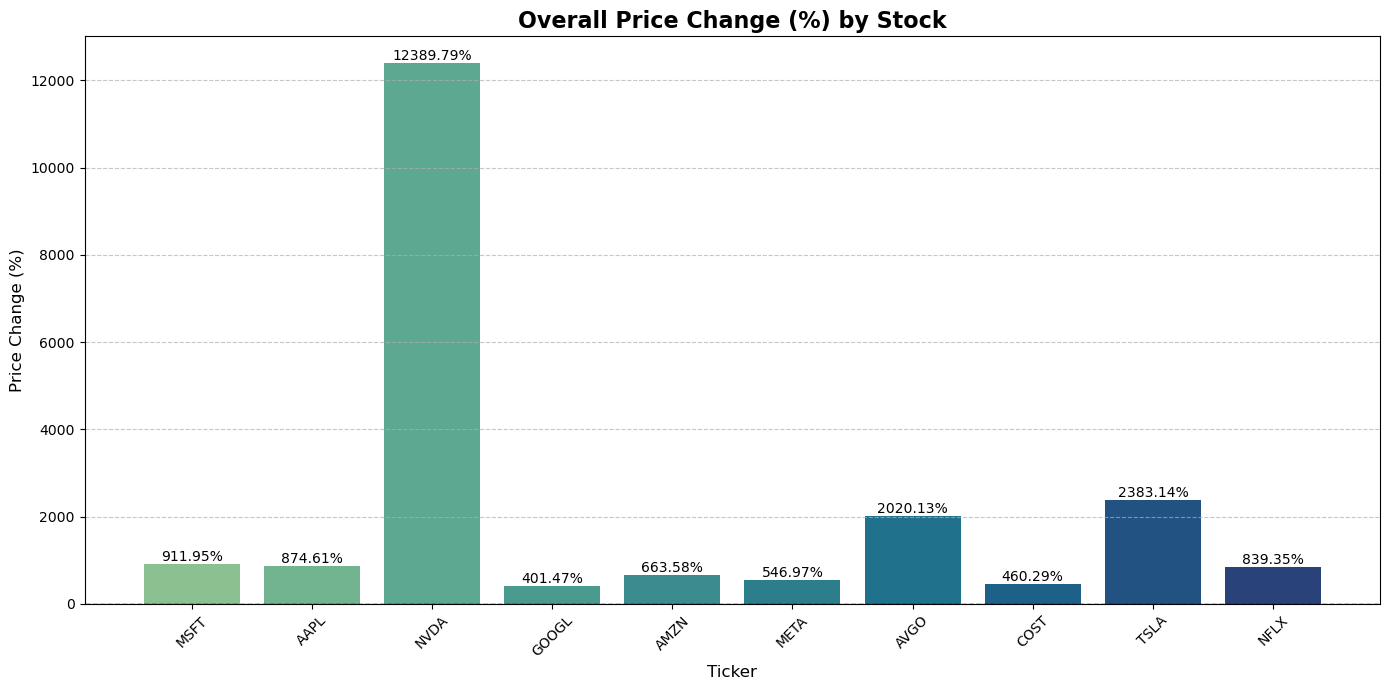

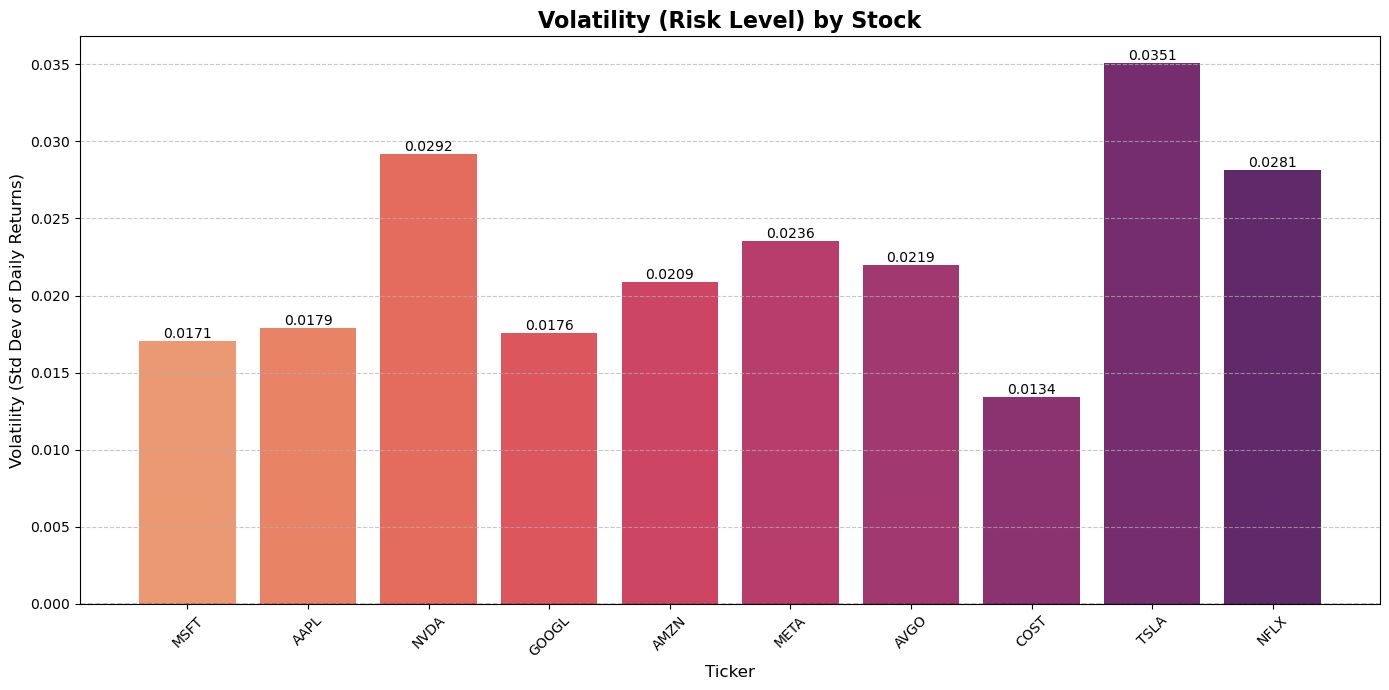

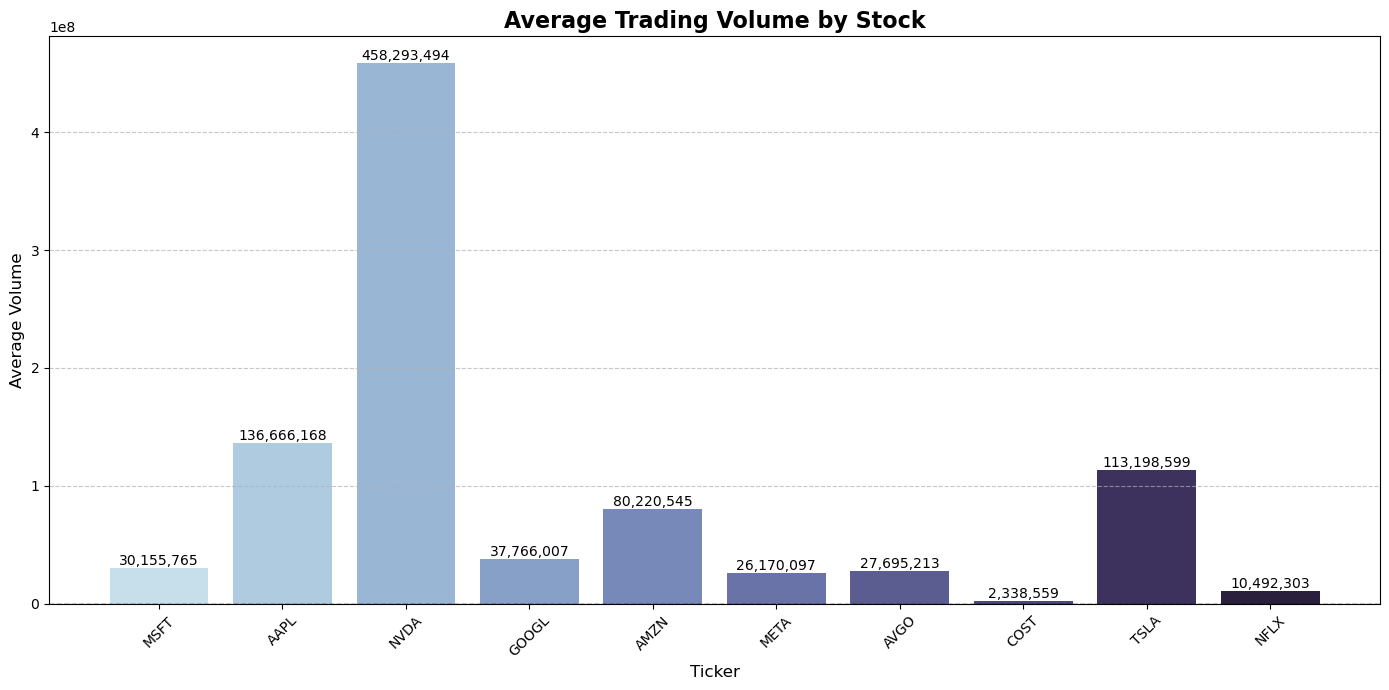

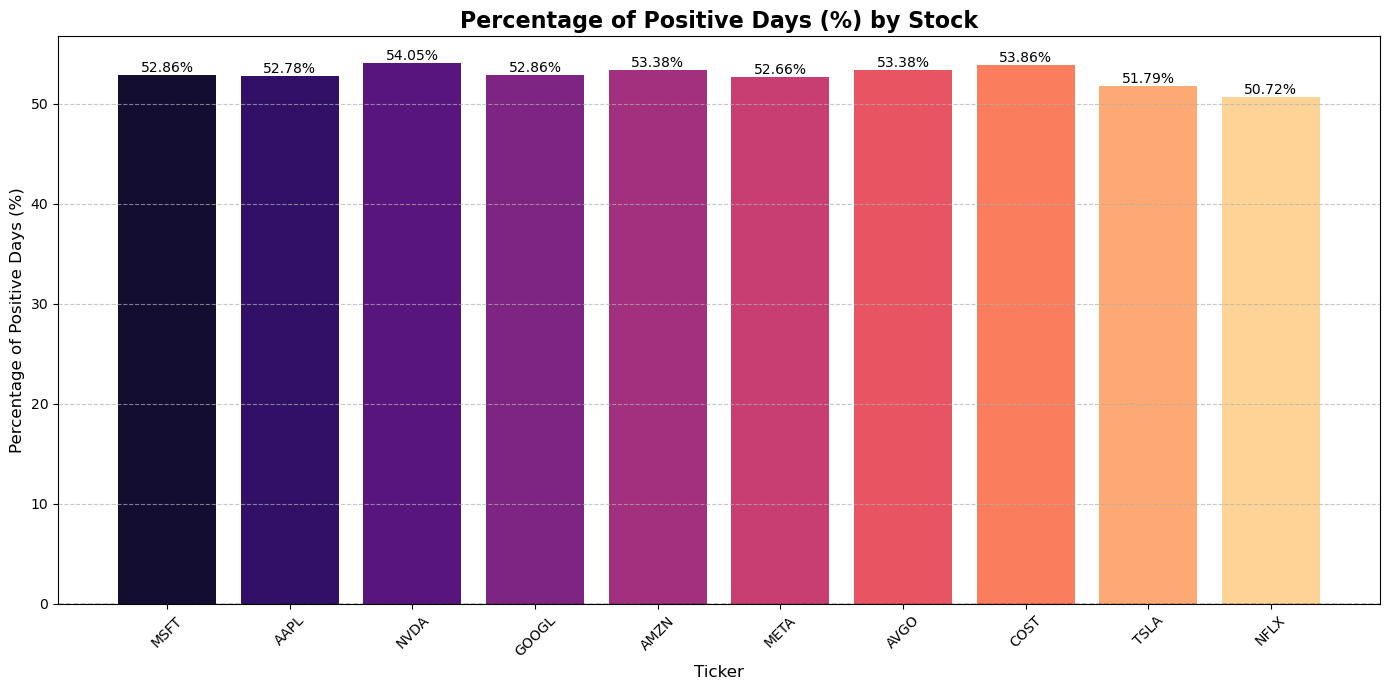

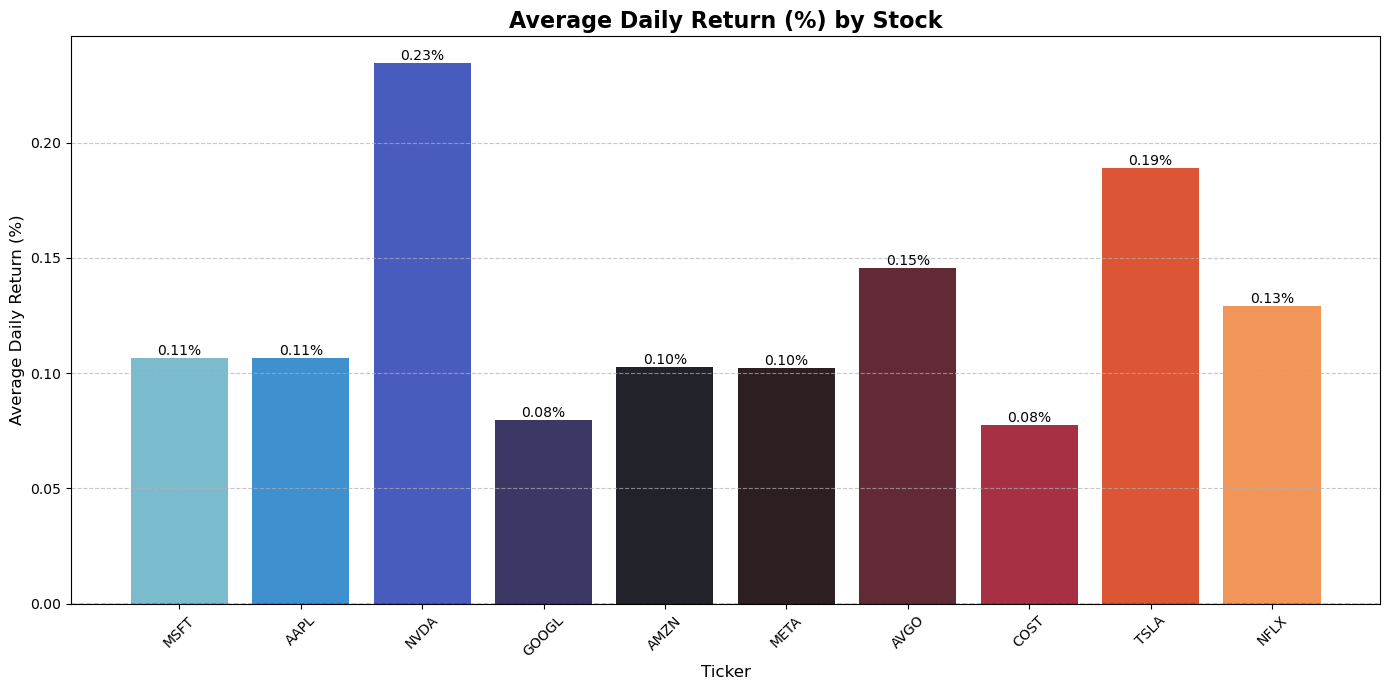

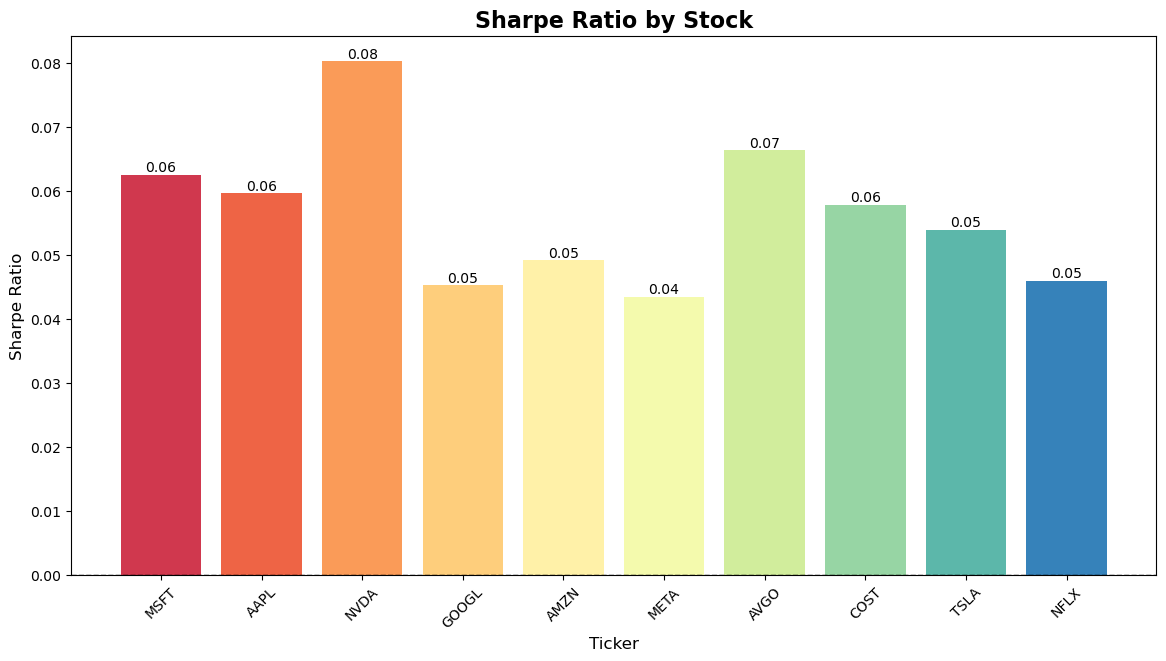

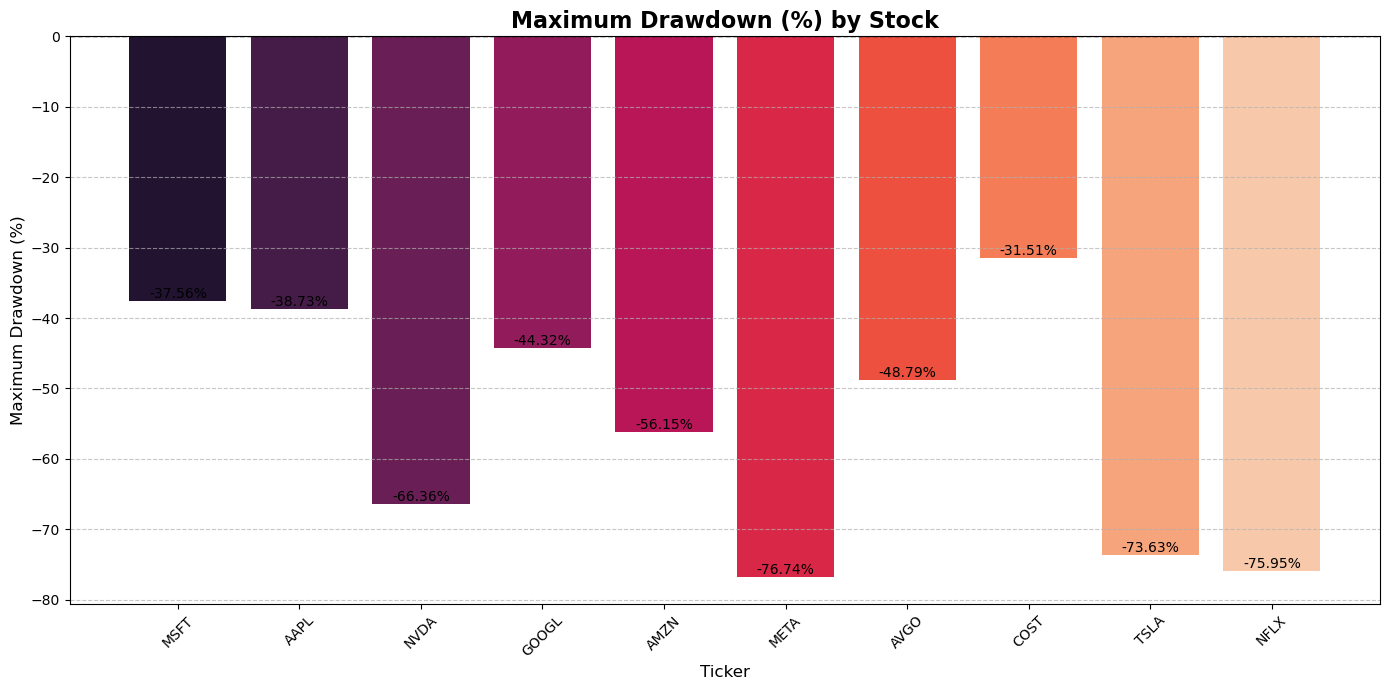

In [8]:


# Create directory to save charts
output_dir = "eda_charts"
os.makedirs(output_dir, exist_ok=True)  # Create output directory if it doesn't exist

# 1. Overall Price Change (%) Chart
plt.figure(figsize=(14, 7))
bars = plt.bar(eda_results_df["Ticker"], eda_results_df["Overall Price Change (%)"], color=sns.color_palette("crest", len(eda_results_df)))
plt.title("Overall Price Change (%) by Stock", fontsize=16, weight='bold')
plt.xlabel("Ticker", fontsize=12)
plt.ylabel("Price Change (%)", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f"{yval:.2f}%", ha='center', va='bottom', fontsize=10)
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Baseline at y=0
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "overall_price_change.png"))
plt.show()

# 2. Volatility (Risk) Chart
plt.figure(figsize=(14, 7))
bars = plt.bar(eda_results_df["Ticker"], eda_results_df["Volatility (Std Dev of Daily Returns)"], color=sns.color_palette("flare", len(eda_results_df)))
plt.title("Volatility (Risk Level) by Stock", fontsize=16, weight='bold')
plt.xlabel("Ticker", fontsize=12)
plt.ylabel("Volatility (Std Dev of Daily Returns)", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f"{yval:.4f}", ha='center', va='bottom', fontsize=10)
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Baseline at y=0
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "volatility_risk.png"))
plt.show()

# 3. Average Trading Volume Chart
plt.figure(figsize=(14, 7))
bars = plt.bar(eda_results_df["Ticker"], eda_results_df["Average Volume"], color=sns.color_palette("ch:s=.25,rot=-.25", len(eda_results_df)))
plt.title("Average Trading Volume by Stock", fontsize=16, weight='bold')
plt.xlabel("Ticker", fontsize=12)
plt.ylabel("Average Volume", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f"{int(yval):,}", ha='center', va='bottom', fontsize=10)
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Baseline at y=0
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "average_trading_volume.png"))
plt.show()

# 4. Percentage of Positive Days (%) Chart
plt.figure(figsize=(14, 7))
bars = plt.bar(eda_results_df["Ticker"], eda_results_df["Percentage of Positive Days (%)"], color=sns.color_palette("magma", len(eda_results_df)))
plt.title("Percentage of Positive Days (%) by Stock", fontsize=16, weight='bold')
plt.xlabel("Ticker", fontsize=12)
plt.ylabel("Percentage of Positive Days (%)", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f"{yval:.2f}%", ha='center', va='bottom', fontsize=10)
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Baseline at y=0
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "percentage_positive_days.png"))
plt.show()

# 5. Average Daily Return (%) Chart
plt.figure(figsize=(14, 7))
bars = plt.bar(eda_results_df["Ticker"], eda_results_df["Average Daily Return (%)"], color=sns.color_palette("icefire", len(eda_results_df)))
plt.title("Average Daily Return (%) by Stock", fontsize=16, weight='bold')
plt.xlabel("Ticker", fontsize=12)
plt.ylabel("Average Daily Return (%)", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f"{yval:.2f}%", ha='center', va='bottom', fontsize=10)
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Baseline at y=0
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "average_daily_return.png"))
plt.show()

# 6. Sharpe Ratio Chart
plt.figure(figsize=(14, 7))
bars = plt.bar(eda_results_df["Ticker"], eda_results_df["Sharpe Ratio"], color=sns.color_palette("Spectral", len(eda_results_df)))
plt.title("Sharpe Ratio by Stock", fontsize=16, weight='bold')
plt.xlabel("Ticker", fontsize=12)
plt.ylabel("Sharpe Ratio", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f"{yval:.2f}", ha='center', va='bottom', fontsize=10)
plt.axhline(0, color='black', linestyle='--', linewidth=1)  

# 7. Maximum Drawdown Chart
plt.figure(figsize=(14, 7))
bars = plt.bar(eda_results_df["Ticker"], eda_results_df["Maximum Drawdown (%)"], color=sns.color_palette("rocket", len(eda_results_df)))
plt.title("Maximum Drawdown (%) by Stock", fontsize=16, weight='bold')
plt.xlabel("Ticker", fontsize=12)
plt.ylabel("Maximum Drawdown (%)", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f"{yval:.2f}%", ha='center', va='bottom', fontsize=10)
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Baseline at y=0
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "maximum_drawdown.png"))
plt.show()


# Trend Analysis for Stocks Performance

MSFT - Trend: Uptrend


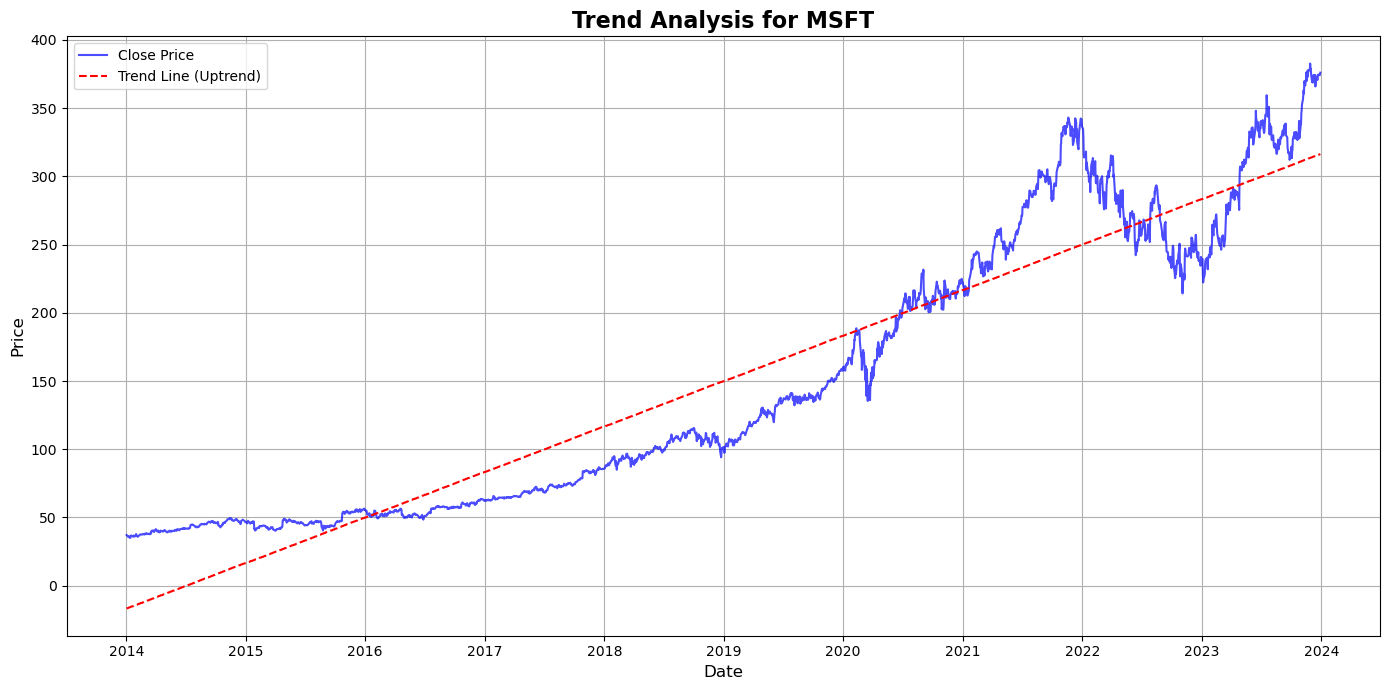

AAPL - Trend: Uptrend


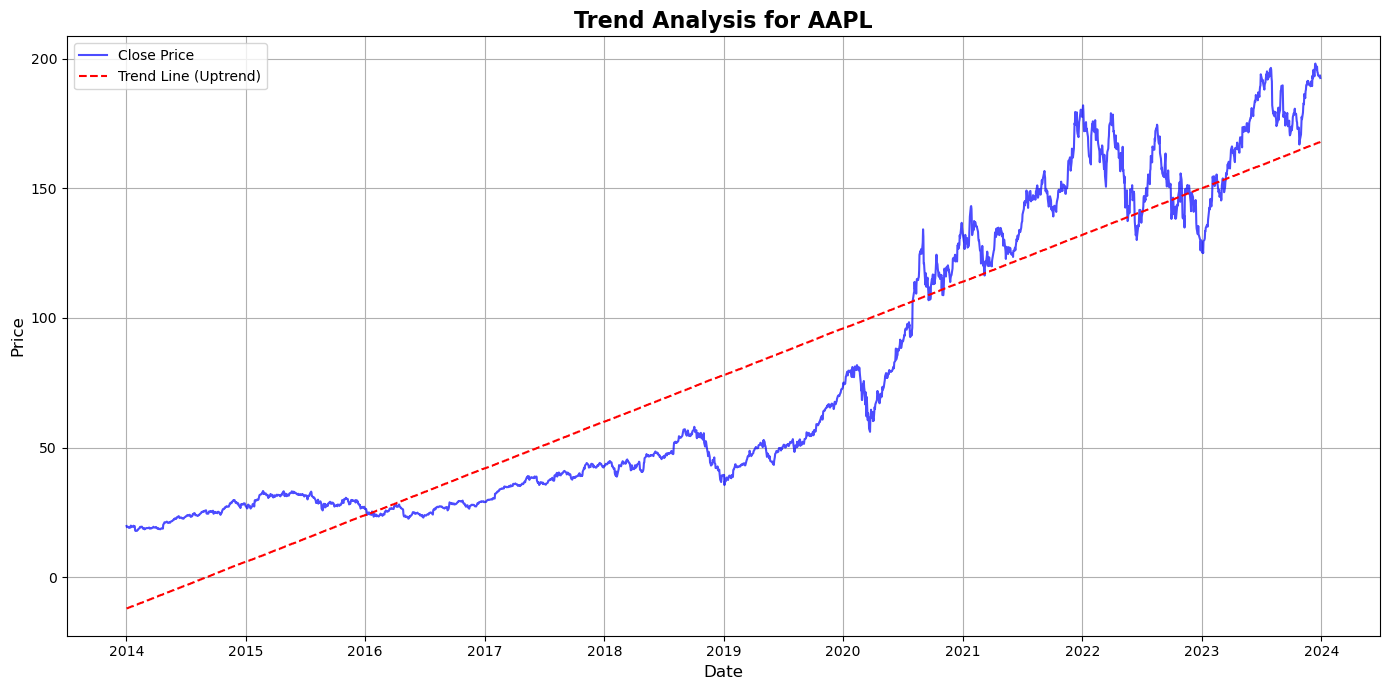

NVDA - Trend: Uptrend


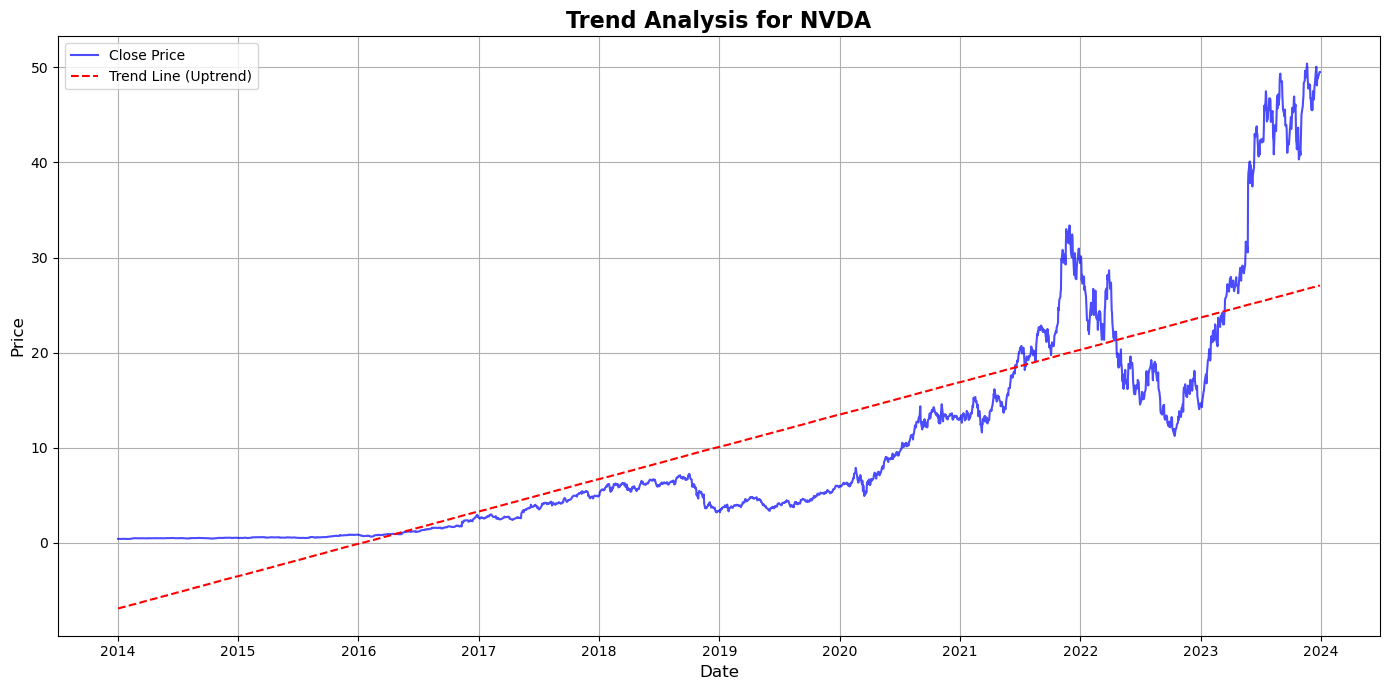

GOOGL - Trend: Uptrend


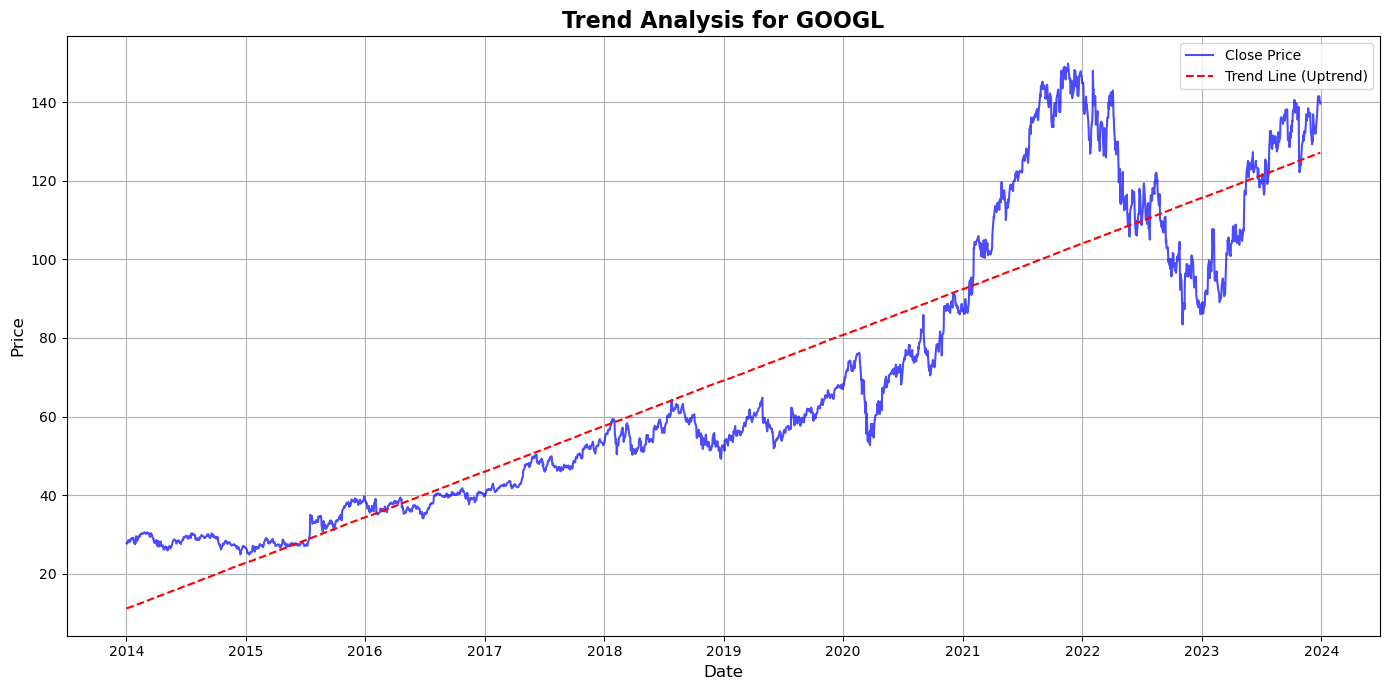

AMZN - Trend: Uptrend


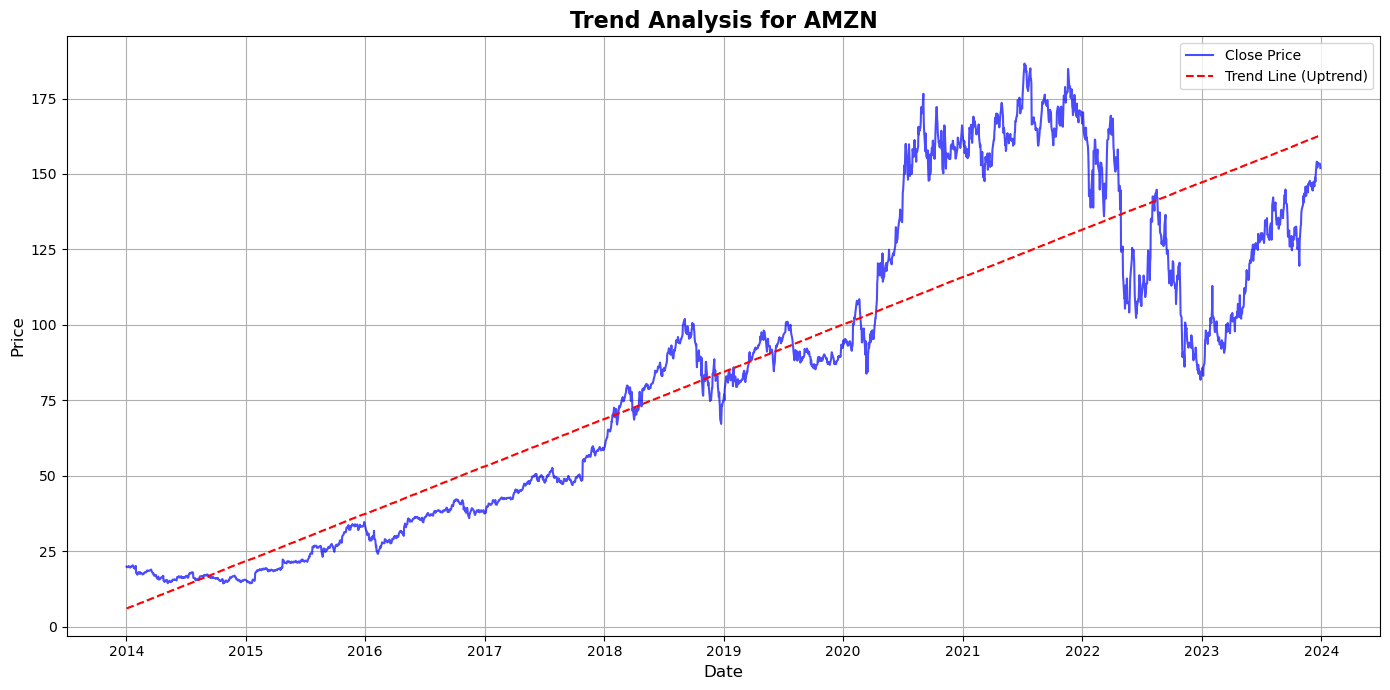

META - Trend: Uptrend


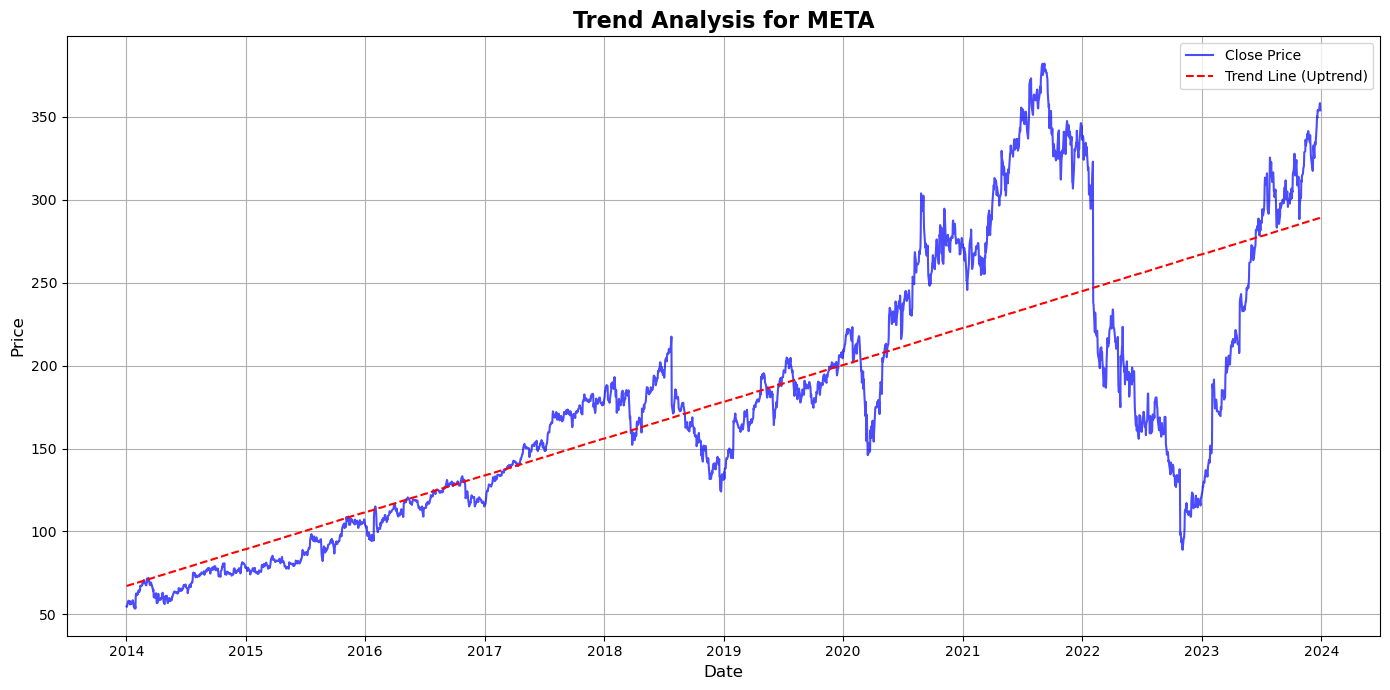

AVGO - Trend: Uptrend


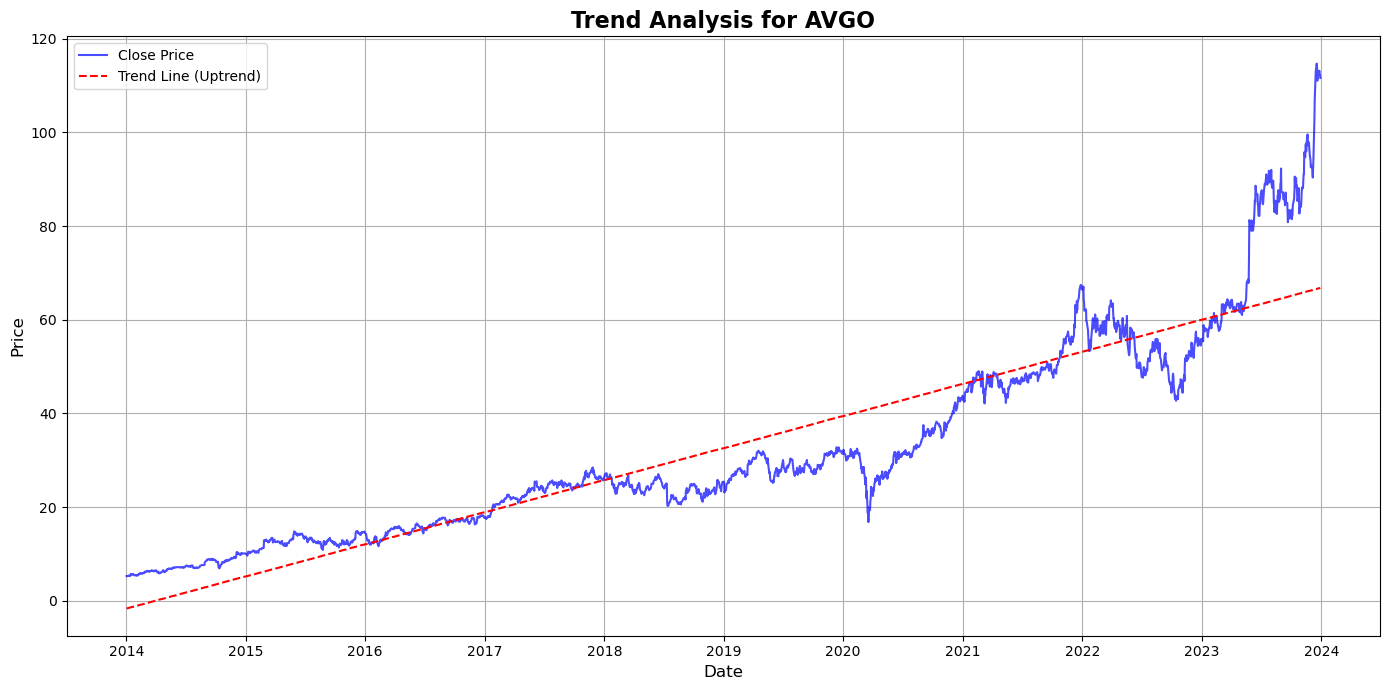

COST - Trend: Uptrend


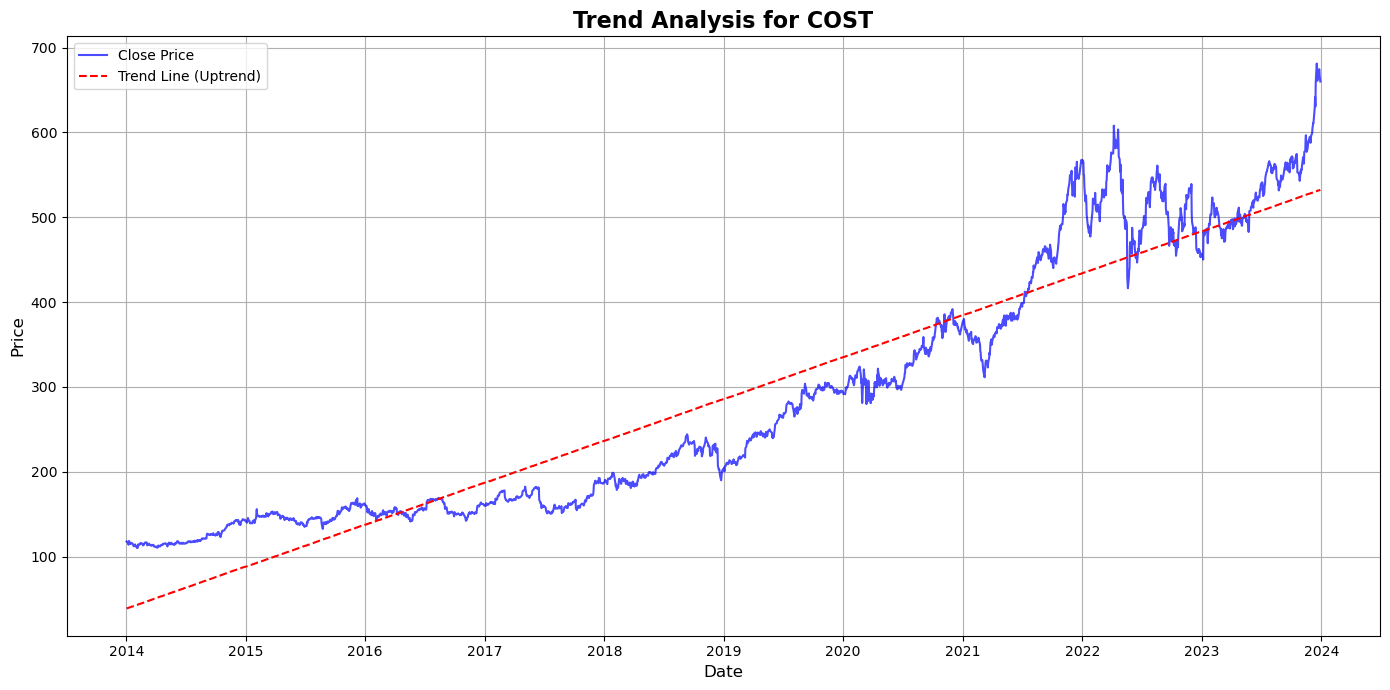

TSLA - Trend: Uptrend


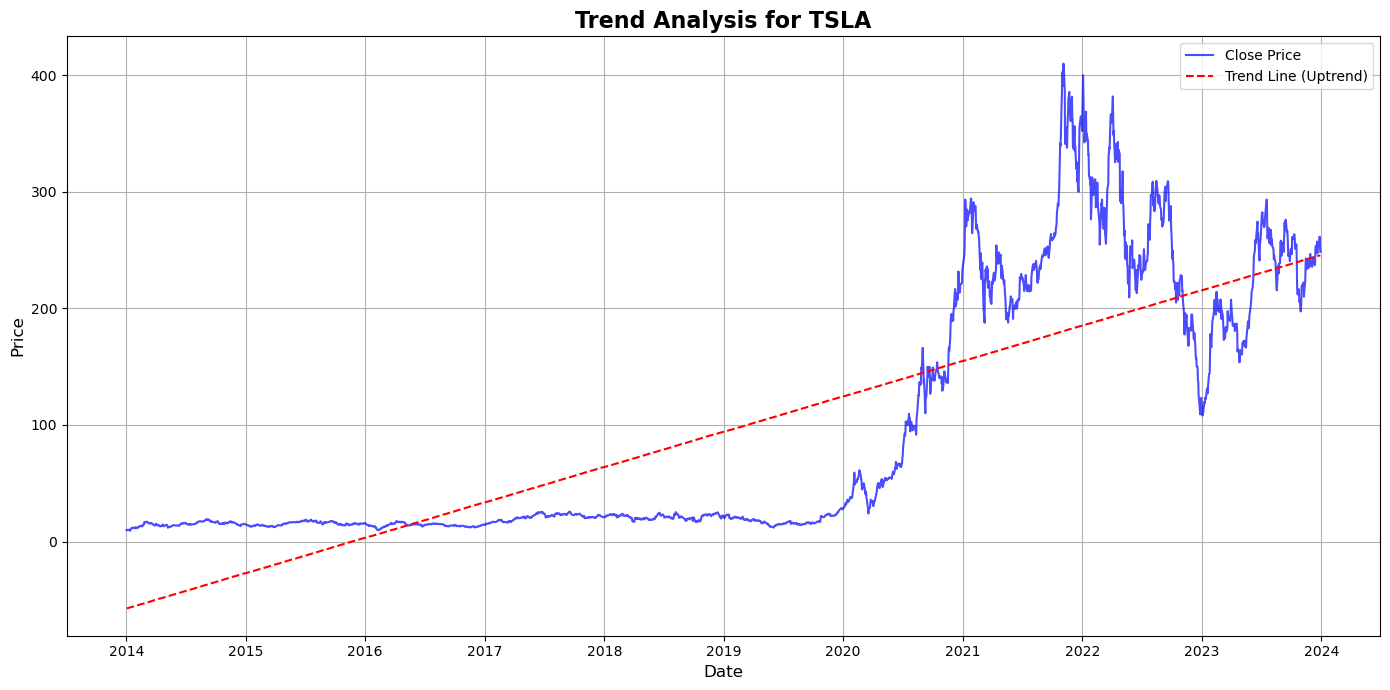

NFLX - Trend: Uptrend


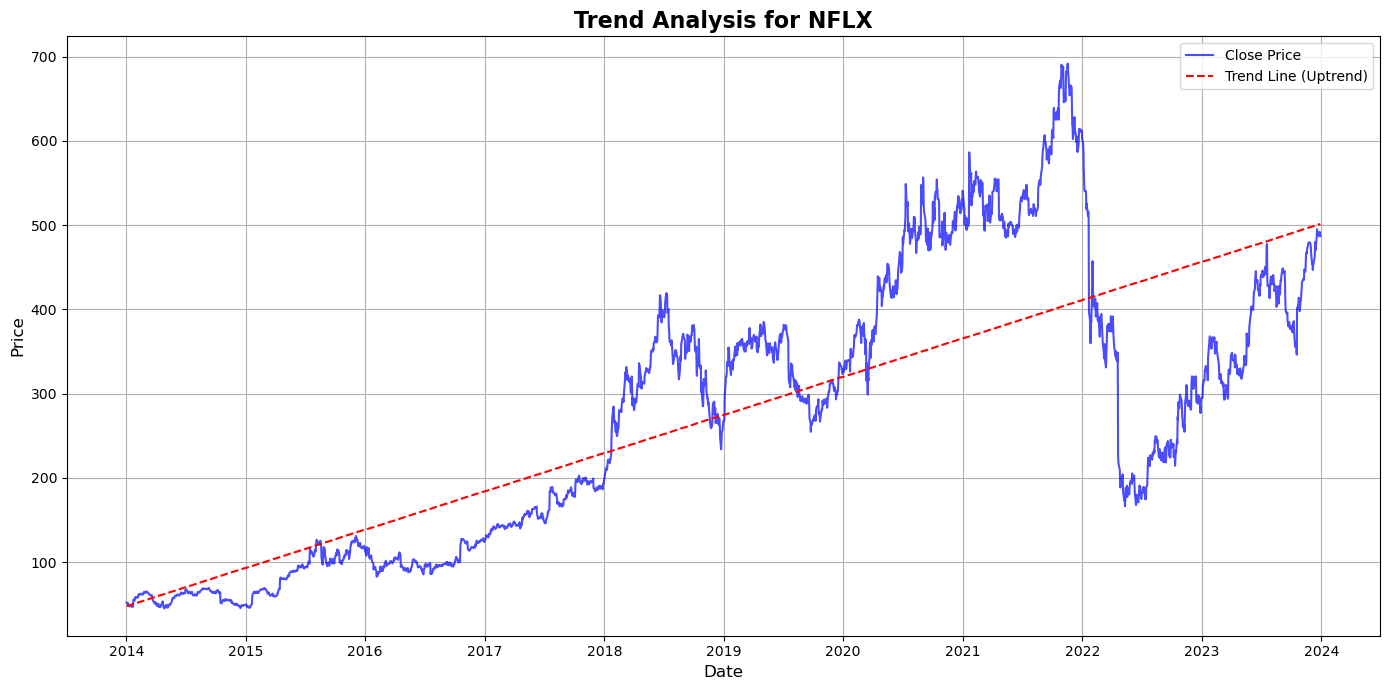

In [10]:
# Directory to save charts
output_dir = "stock_trend_charts"
os.makedirs(output_dir, exist_ok=True)

# Analyze each stock's trend
for ticker in tickers:
    try:
        # Extract stock data
        df_stock = df1[ticker].dropna()

        # Calculate key metrics for trend analysis
        x = np.arange(len(df_stock))  # Numeric index for dates
        y = df_stock['Close'].values  # Closing prices
        slope, intercept, r_value, p_value, std_err = linregress(x, y)

        # Determine trend type
        trend = "Uptrend" if slope > 0 else "Downtrend"

        print(f"{ticker} - Trend: {trend}")

        # Plot Stock Prices with Trend Line
        plt.figure(figsize=(14, 7))
        plt.plot(df_stock.index, df_stock['Close'], label="Close Price", color="blue", alpha=0.7)
        plt.plot(df_stock.index, intercept + slope * x, label=f"Trend Line ({trend})", color="red", linestyle="--")
        
        # Configure the plot
        plt.title(f"Trend Analysis for {ticker}", fontsize=16, weight='bold')
        plt.xlabel("Date", fontsize=12)
        plt.ylabel("Price", fontsize=12)
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error processing trend analysis for {ticker}: {e}")


#  Strategy Definitions

In [12]:
import pandas as pd
import pandas_ta as ta

def ema_strategy(df):
    """
    Apply an Exponential Moving Average (EMA) Crossover strategy to generate buy and sell signals.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing 'Close' prices.

    Returns:
    pd.DataFrame: DataFrame with additional columns for 'EMA_20', 'EMA_50', 'Buy_Signal_EMA', and 'Sell_Signal_EMA'.
    """
    df['EMA_20'] = ta.ema(df['Close'], length=20)
    df['EMA_50'] = ta.ema(df['Close'], length=50)
    df['Buy_Signal_EMA'] = (df['EMA_20'] > df['EMA_50']) & (df['EMA_20'].shift(1) <= df['EMA_50'].shift(1))
    df['Sell_Signal_EMA'] = (df['EMA_20'] < df['EMA_50']) & (df['EMA_20'].shift(1) >= df['EMA_50'].shift(1))
    return df

def stochastic_strategy(df):
    """
    Apply a Stochastic Oscillator strategy to identify buy and sell signals based on overbought and oversold levels.

    Parameters:
    df (pd.DataFrame): DataFrame containing 'High', 'Low', and 'Close' prices.

    Returns:
    pd.DataFrame: DataFrame with additional columns for stochastic indicators and buy/sell signals.
    """
    df.ta.stoch(high='High', low='Low', close='Close', append=True)
    df['Buy_Signal_Stochastic'] = (df['STOCHk_14_3_3'] > df['STOCHd_14_3_3']) & (df['STOCHk_14_3_3'] < 20)
    df['Sell_Signal_Stochastic'] = (df['STOCHk_14_3_3'] < df['STOCHd_14_3_3']) & (df['STOCHk_14_3_3'] > 80)
    return df

def zero_line_strategy(df):
    """
    Apply a MACD Zero Line Crossover strategy to determine buy and sell points.

    Parameters:
    df (pd.DataFrame): DataFrame containing 'Close' prices.

    Returns:
    pd.DataFrame: DataFrame with additional columns for MACD values and buy/sell signals.
    """
    df.ta.macd(close='Close', fast=12, slow=26, signal=9, append=True)
    df['Buy_Signal_ZeroLine'] = (df['MACD_12_26_9'] > 0) & (df['MACD_12_26_9'].shift(1) <= 0)
    df['Sell_Signal_ZeroLine'] = (df['MACD_12_26_9'] < 0) & (df['MACD_12_26_9'].shift(1) >= 0)
    return df

def trailing_stop_strategy(df):
    """
    Implement a Trailing Stop strategy where sell signals are generated based on a specified drop from the highest price.

    Parameters:
    df (pd.DataFrame): DataFrame containing 'Close' prices.

    Returns:
    pd.DataFrame: DataFrame with additional columns for maximum trailing value and sell signals.
    """
    df['Trailing_Max'] = df['Close'].cummax()
    df['Sell_Signal_Trailing'] = (df['Close'] < (df['Trailing_Max'] * 0.95))
    df['Buy_Signal_Trailing'] = ~df['Sell_Signal_Trailing']
    return df

def volatility_breakout_strategy(df):
    """
    Use the previous day's range to determine breakout levels and generate buy or sell signals based on price movements relative to these levels.

    Parameters:
    df (pd.DataFrame): DataFrame containing 'High', 'Low', and 'Close' prices.

    Returns:
    pd.DataFrame: DataFrame with additional columns for breakout levels and buy/sell signals.
    """
    df['Range'] = df['High'] - df['Low']
    df['Breakout_Level'] = df['Close'].shift(1) + (0.5 * df['Range'].shift(1))
    df['Buy_Signal_Volatility'] = df['Close'] > df['Breakout_Level']
    df['Sell_Signal_Volatility'] = df['Close'] < df['Breakout_Level']
    return df

def timeframe_filtering_strategy(df):
    """
    Use short-term and long-term Exponential Moving Averages (EMAs) to filter buy/sell opportunities.

    Parameters:
    df (pd.DataFrame): DataFrame containing 'Close' prices.

    Returns:
    pd.DataFrame: DataFrame with additional columns for EMAs and buy/sell signals.
    """
    df['EMA_50'] = ta.ema(df['Close'], length=50)
    df['EMA_20'] = ta.ema(df['Close'], length=20)
    df['Buy_Signal_Timeframe'] = (df['EMA_20'] > df['EMA_50']) & (df['Close'] > df['EMA_50'])
    df['Sell_Signal_Timeframe'] = (df['Close'] < df['EMA_50'])
    return df

def mean_reversion_strategy(df):
    """
    Apply a Mean Reversion strategy that generates buy and sell signals when the price deviates significantly from its 20-period moving average.

    Parameters:
    df (pd.DataFrame): DataFrame containing 'Close' prices.

    Returns:
    pd.DataFrame: DataFrame with additional columns for mean, standard deviation, and buy/sell signals.
    """
    df['Mean'] = df['Close'].rolling(window=20).mean()
    df['Std'] = df['Close'].rolling(window=20).std()
    df['Buy_Signal_MeanRev'] = df['Close'] < (df['Mean'] - 2 * df['Std'])
    df['Sell_Signal_MeanRev'] = df['Close'] > (df['Mean'] + 2 * df['Std'])
    return df

def heikin_ashi_strategy(df):
    """
    Apply a Heikin Ashi strategy to generate buy and sell signals based on trend confirmation with modified candlestick calculations.

    Parameters:
    df (pd.DataFrame): DataFrame containing 'Open', 'High', 'Low', and 'Close' prices.

    Returns:
    pd.DataFrame: DataFrame with additional columns for Heikin Ashi values and buy/sell signals.
    """
    df['HA_Close'] = (df['Open'] + df['High'] + df['Low'] + df['Close']) / 4
    df['HA_Open'] = (df['Open'].shift(1) + df['Close'].shift(1)) / 2
    df['HA_High'] = df[['High', 'HA_Open', 'HA_Close']].max(axis=1)
    df['HA_Low'] = df[['Low', 'HA_Open', 'HA_Close']].min(axis=1)

    df['Buy_Signal_HA'] = (df['HA_Close'] > df['HA_Open']).rolling(window=3).sum() == 3
    df['Sell_Signal_HA'] = (df['HA_Close'] < df['HA_Open']).rolling(window=3).sum() == 3
    return df

def vwma_strategy(df):
    """
    Apply a Volume Weighted Moving Average (VWMA) Crossover strategy to generate buy and sell signals based on volume-weighted price movements.

    Parameters:
    df (pd.DataFrame): DataFrame containing 'Close' prices and 'Volume'.

    Returns:
    pd.DataFrame: DataFrame with additional columns for VWMA values and buy/sell signals.
    """
    df['VWMA_20'] = (df['Close'] * df['Volume']).rolling(window=20).sum() / df['Volume'].rolling(window=20).sum()
    df['VWMA_50'] = (df['Close'] * df['Volume']).rolling(window=50).sum() / df['Volume'].rolling(window=50).sum()

    df['Buy_Signal_VWMA'] = (df['VWMA_20'] > df['VWMA_50']) & (df['VWMA_20'].shift(1) <= df['VWMA_50'].shift(1))
    df['Sell_Signal_VWMA'] = (df['VWMA_20'] < df['VWMA_50']) & (df['VWMA_20'].shift(1) >= df['VWMA_50'].shift(1))
    return df

def advanced_multi_indicator_strategy2(df):
    """
    Utilize multiple technical indicators to generate comprehensive buy and sell signals for complex trading strategies.

    Parameters:
    df (pd.DataFrame): DataFrame containing 'Close', 'High', 'Low', 'Volume', and initial technical indicators if pre-computed.

    Returns:
    pd.DataFrame: DataFrame enhanced with multiple technical indicators and corresponding buy/sell signals.
    """
    # Ensure all necessary indicators are computed
    if 'EMA_20' not in df.columns:
        df['EMA_20'] = ta.ema(df['Close'], length=20)
    if 'EMA_50' not in df.columns:
        df['EMA_50'] = ta.ema(df['Close'], length=50)
    if 'RSI' not in df.columns:
        df['RSI'] = ta.rsi(df['Close'], length=14)
    if 'MACD' not in df.columns or 'MACD_Signal' not in df.columns:
        macd = ta.macd(df['Close'])
        df['MACD'] = macd['MACD_12_26_9']
        df['MACD_Signal'] = macd['MACDs_12_26_9']
    if 'VWMA' not in df.columns:
        df['VWMA'] = (df['Close'] * df['Volume']).rolling(window=20).sum() / df['Volume'].rolling(window=20).sum()
    if 'ADX' not in df.columns:
        adx = ta.adx(df['High'], df['Low'], df['Close'], length=14)
        df['ADX'] = adx['ADX_14']
    if 'Stoch_K' not in df.columns or 'Stoch_D' not in df.columns:
        stoch = ta.stoch(df['High'], df['Low'], df['Close'])
        df['Stoch_K'] = stoch['STOCHk_14_3_3']
        df['Stoch_D'] = stoch['STOCHd_14_3_3']
    if 'Momentum' not in df.columns:
        df['Momentum'] = ta.mom(df['Close'], length=10)

    # Define complex buy/sell conditions
    df['Buy_Signal_Advanced'] = (
        (df['EMA_20'] > df['EMA_50']) & (df['RSI'] > 50) & (df['MACD'] > df['MACD_Signal']) & 
        (df['Close'] > df['VWMA']) & (df['ADX'] > 25) & (df['Stoch_K'] > df['Stoch_D']) & (df['Momentum'] > 0)
    )
    df['Sell_Signal_Advanced'] = (
        (df['EMA_20'] < df['EMA_50']) & (df['RSI'] < 50) & (df['MACD'] < df['MACD_Signal']) & 
        (df['Close'] < df['VWMA']) & (df['ADX'] > 25) & (df['Stoch_K'] < df['Stoch_D']) & (df['Momentum'] < 0)
    )
    return df

def combined_timeframe_strategy(df):
    """
    Combine multiple technical indicators across different timeframes to generate buy and sell signals, aiming to enhance the robustness of trading signals.

    Parameters:
    df (pd.DataFrame): DataFrame containing 'Close', 'High', 'Low', 'Volume', and potentially pre-computed technical indicators.

    Returns:
    pd.DataFrame: DataFrame enhanced with multiple time frame analysis and corresponding buy/sell signals.
    """
    # Ensure all necessary indicators are present
    if 'EMA_20' not in df.columns:
        df['EMA_20'] = ta.ema(df['Close'], length=20)
    if 'EMA_50' not in df.columns:
        df['EMA_50'] = ta.ema(df['Close'], length=50)
    if 'EMA_200' not in df.columns:
        df['EMA_200'] = ta.ema(df['Close'], length=200)
    if 'RSI' not in df.columns:
        df['RSI'] = ta.rsi(df['Close'], length=14)
    if 'MACD' not in df.columns or 'MACD_Signal' not in df.columns:
        macd = ta.macd(df['Close'])
        df['MACD'] = macd['MACD_12_26_9']
        df['MACD_Signal'] = macd['MACDs_12_26_9']
    if 'VWMA' not in df.columns:
        df['VWMA'] = (df['Close'] * df['Volume']).rolling(window=20).sum() / df['Volume'].rolling(window=20).sum()
    if 'ADX' not in df.columns:
        adx = ta.adx(df['High'], df['Low'], df['Close'], length=14)
        df['ADX'] = adx['ADX_14']
    if 'Stoch_K' not in df.columns or 'Stoch_D' not in df.columns:
        stoch = ta.stoch(df['High'], df['Low'], df['Close'])
        df['Stoch_K'] = stoch['STOCHk_14_3_3']
        df['Stoch_D'] = stoch['STOCHd_14_3_3']
    if 'Momentum' not in df.columns:
        df['Momentum'] = ta.mom(df['Close'], length=10)

    # Define combined buy/sell conditions
    df['Buy_Signal_Combined'] = (
        # Short-Term Buy Signal
        ((df['EMA_20'] > df['EMA_50']) & (df['RSI'] > 50) & (df['MACD'] > df['MACD_Signal'])) |

        # Mid-Term Buy Signal
        ((df['EMA_50'] > df['EMA_200']) & (df['RSI'] > 55) & (df['Stoch_K'] > df['Stoch_D']) & (df['ADX'] > 20)) |

        # Long-Term Buy Signal
        ((df['Close'] > df['EMA_200']) & (df['Momentum'] > 0) & (df['RSI'] > 60) & (df['Close'] > df['VWMA']))
    )
    
    df['Sell_Signal_Combined'] = (
        # Short-Term Sell Signal
        ((df['EMA_20'] < df['EMA_50']) & (df['RSI'] < 50) & (df['MACD'] < df['MACD_Signal'])) |

        # Mid-Term Sell Signal
        ((df['EMA_50'] < df['EMA_200']) & (df['RSI'] < 45) & (df['Stoch_K'] < df['Stoch_D']) & (df['ADX'] > 20)) |

        # Long-Term Sell Signal
        ((df['Close'] < df['EMA_200']) & (df['Momentum'] < 0) & (df['RSI'] < 40) & (df['Close'] < df['VWMA']))
    )
    return df



strategies = [
    ('EMA', ema_strategy, 'Buy_Signal_EMA', 'Sell_Signal_EMA'),
    ('Stochastic', stochastic_strategy, 'Buy_Signal_Stochastic', 'Sell_Signal_Stochastic'),
    ('Zero Line Cross', zero_line_strategy, 'Buy_Signal_ZeroLine', 'Sell_Signal_ZeroLine'),
    ('Trailing Stop', trailing_stop_strategy, 'Buy_Signal_Trailing', 'Sell_Signal_Trailing'),
    ('Volatility Breakout', volatility_breakout_strategy, 'Buy_Signal_Volatility', 'Sell_Signal_Volatility'),
    ('Timeframe Filtering', timeframe_filtering_strategy, 'Buy_Signal_Timeframe', 'Sell_Signal_Timeframe'),
    ('Mean Reversion', mean_reversion_strategy, 'Buy_Signal_MeanRev', 'Sell_Signal_MeanRev'),
    ('Heikin Ashi', heikin_ashi_strategy, 'Buy_Signal_HA', 'Sell_Signal_HA'),
    ('VWMA', vwma_strategy, 'Buy_Signal_VWMA', 'Sell_Signal_VWMA'),
    ('Multi-Indicators 1', advanced_multi_indicator_strategy2, 'Buy_Signal_Advanced', 'Sell_Signal_Advanced'),
    ('Multi-Indicators 2', combined_timeframe_strategy, 'Buy_Signal_Combined', 'Sell_Signal_Combined')
]

# Creating Backtesting Function

In [14]:
def backtest(df, buy_signal_col, sell_signal_col, ticker):
    """
    Backtest function to evaluate a strategy's performance based on buy/sell signals.

    Parameters:
        df (pd.DataFrame): The DataFrame containing stock data and signals.
        buy_signal_col (str): The column name for buy signals.
        sell_signal_col (str): The column name for sell signals.
        ticker (str): The stock ticker being analyzed.

    Returns:
        List[Dict]: A list of trade details, including buy date, sell date, and returns.
    """
    position = 0  # Current position (1 if holding the stock, 0 otherwise)
    buy_price = None  # Price at which the stock was bought
    results = []  # To store trade results

    for i in range(1, len(df)):
        close_price = df['Close'].iloc[i]

        # Execute a buy if a buy signal is triggered and no current position
        if df[buy_signal_col].iloc[i] and position == 0:
            position = 1
            buy_price = close_price
            buy_date = df.index[i]

        # Execute a sell if a sell signal is triggered and currently holding a position
        elif df[sell_signal_col].iloc[i] and position > 0:
            sell_price = close_price
            sell_date = df.index[i]
            profit_loss = sell_price - buy_price
            profit_percentage = (profit_loss / buy_price) * 100

            # Append trade details to results
            results.append({
                'Ticker': ticker,
                'Buy Date': buy_date,
                'Sell Date': sell_date,
                'Buy Price': buy_price,
                'Sell Price': sell_price,
                'Win/Loss': "Win" if profit_loss > 0 else "Loss",
                'Return %': profit_percentage
            })

            # Reset position
            position = 0

    return results

# Evaluating Trading Strategies Against Mutual Fund Performance

In [16]:

# Define Mutual Fund Returns (Year by Year)
mutual_fund_returns = {
    2014: 18.76,
    2015: 8.25,
    2016: 5.30,
    2017: 30.80,
    2018: -2.29,
    2019: 35.77,
    2020: 44.10,
    2021: 25.45,
    2022: -34.05,
    2023: 51.24,
}

# Calculate overall average return and risk level of the mutual fund
mutual_fund_overall_avg_return = sum(mutual_fund_returns.values()) / len(mutual_fund_returns)
mutual_fund_risk_level = 18.4

# Initialize dictionaries to store metrics for strategies
strategy_metrics = {
    "overall_averages": {},
    "annual_returns": {},
    "win_rates": {},
    "transaction_counts": {},
    "risk_levels": {},
    "positive_return_percentages": {},
    "most_positive_periods": {},
    "drawdowns": {},  # Store max drawdowns
}

win_rate_vs_avg_return = []  # To store win rates and avg returns for plotting

# Loop through each strategy and calculate metrics
for strategy_name, strategy_function, buy_signal_col, sell_signal_col in strategies:
    print(f"Running strategy: {strategy_name}")
    
    # Store results for the current strategy
    strategy_results = []

    # Loop through each ticker
    for ticker in tickers:
        try:
            # Drop NaN rows for the current ticker
            df = df1[ticker].dropna()

            # Apply the strategy to the selected ticker's DataFrame
            df = strategy_function(df)

            # Ensure buy/sell signals exist before backtesting
            if buy_signal_col in df.columns and sell_signal_col in df.columns:
                backtest_results = backtest(df, buy_signal_col, sell_signal_col, ticker)

                # Append results for this strategy and ticker
                for result in backtest_results:
                    result['Ticker'] = ticker
                    result['Strategy'] = strategy_name
                    strategy_results.append(result)
            else:
                print(f"Missing signals for {strategy_name} on {ticker}")
        except Exception as e:
            print(f"Error processing {ticker} with {strategy_name}: {e}")

    # Convert results for the current strategy to DataFrame
    strategy_results_df = pd.DataFrame(strategy_results)

    # If there are no results, skip to the next strategy
    if strategy_results_df.empty:
        print(f"No results for strategy {strategy_name}\n")
        continue

    # Calculate metrics for the current strategy
    strategy_results_df['Year'] = pd.DatetimeIndex(strategy_results_df['Sell Date']).year

    # Calculate annual returns grouped by year and ticker
    annual_returns = strategy_results_df.groupby(['Year', 'Ticker'])['Return %'].sum().reset_index()

    # Calculate average return for each year across all tickers
    annual_average = annual_returns.groupby('Year')['Return %'].mean().reset_index().rename(columns={'Return %': 'Total Return %'})

    # Store annual returns for this strategy
    strategy_metrics["annual_returns"][strategy_name] = dict(zip(annual_average['Year'], annual_average['Total Return %']))

    # Calculate total number of transactions
    no_of_transactions = len(strategy_results_df)
    strategy_metrics["transaction_counts"][strategy_name] = no_of_transactions

    # Calculate win rate percentage
    win_rate_percentage = (strategy_results_df['Win/Loss'].value_counts().get('Win', 0) / no_of_transactions) * 100
    strategy_metrics["win_rates"][strategy_name] = win_rate_percentage

    # Calculate total average return across all years
    total_average_return = annual_average['Total Return %'].mean()

    # Calculate standard deviation of returns (Risk Level)
    return_std_dev = strategy_results_df['Return %'].std()
    strategy_metrics["risk_levels"][strategy_name] = return_std_dev

    # Calculate percentage of positive returns
    positive_return_percentage = (strategy_results_df['Return %'] > 0).sum() / len(strategy_results_df) * 100
    strategy_metrics["positive_return_percentages"][strategy_name] = positive_return_percentage

    # Determine the most positive period
    most_positive_period = annual_average.loc[annual_average['Total Return %'].idxmax()]
    strategy_metrics["most_positive_periods"][strategy_name] = most_positive_period

    # Average return per trade
    avg_return_per_trade = strategy_results_df['Return %'].mean()

    # Store the overall average return for this strategy
    strategy_metrics["overall_averages"][strategy_name] = total_average_return

    # Add data for Win Rate vs Average Return for plotting
    win_rate_vs_avg_return.append({
        "Strategy": strategy_name,
        "Win Rate": win_rate_percentage,
        "Average Return": total_average_return
    })

    # Display results for the current strategy
    print(f"\nResults for strategy: {strategy_name}")
    print("Annual Returns by Ticker:")
    print(annual_returns)
    print("\nAnnual Average Return Across Tickers:")
    print(annual_average)
    print(f"\nTotal Number of Transactions: {no_of_transactions}")
    print(f"Win Rate Percentage: {win_rate_percentage:.2f}%")
    print(f"Total Average Return: {total_average_return:.2f}%")
    print(f"Standard Deviation of Returns (Risk Level): {return_std_dev:.2f}%")
    print(f"Percentage of Positive Returns: {positive_return_percentage:.2f}%")
    print(f"Most Positive Period: {most_positive_period['Year']} Year with {most_positive_period['Total Return %']:.2f}%")
    print(f"Average Return per Trade: {avg_return_per_trade:.2f}%")

# Convert Win Rate vs Average Return to DataFrame for plotting
win_rate_vs_avg_return_df = pd.DataFrame(win_rate_vs_avg_return)

# Summarized Findings for All Strategies
print("\nComparison of Overall Metrics with Mutual Fund:")
print(f"Mutual Fund Overall Average Return (2014-2023): {mutual_fund_overall_avg_return:.2f}%")
print(f"Mutual Fund Risk Level (Std Dev): {mutual_fund_risk_level:.2f}%\n")

for strategy, avg_return in strategy_metrics["overall_averages"].items():
    print(f"Strategy '{strategy}' Overall Average Return: {avg_return:.2f}%")
    print(f"Strategy '{strategy}' Risk Level (Std Dev): {strategy_metrics['risk_levels'][strategy]:.2f}%")
    print(f"Strategy '{strategy}' Win Rate: {strategy_metrics['win_rates'][strategy]:.2f}%")
    print(f"Strategy '{strategy}' Total Transactions: {strategy_metrics['transaction_counts'][strategy]}")
    print(f"Strategy '{strategy}' Percentage of Positive Returns: {strategy_metrics['positive_return_percentages'][strategy]:.2f}%")
    print(f"Strategy '{strategy}' Most Positive Period: {strategy_metrics['most_positive_periods'][strategy]}")
    # Compare Strategy with Mutual Fund
    if avg_return > mutual_fund_overall_avg_return:
        print(f"  Result: Strategy '{strategy}' outperformed the mutual fund.")
    else:
        print(f"  Result: Strategy '{strategy}' underperformed the mutual fund.")
    if strategy_metrics['risk_levels'][strategy] < mutual_fund_risk_level:
        print(f"  Risk Comparison: Strategy '{strategy}' is less risky compared to the mutual fund.")
    else:
        print(f"  Risk Comparison: Strategy '{strategy}' is riskier compared to the mutual fund.")



Running strategy: EMA

Results for strategy: EMA
Annual Returns by Ticker:
    Year Ticker    Return %
0   2014   AAPL   -1.752561
1   2014   AMZN  -14.294553
2   2014  GOOGL    1.040839
3   2014   META   17.282778
4   2014   NFLX   -9.305185
..   ...    ...         ...
84  2023  GOOGL   12.170960
85  2023   MSFT   24.882996
86  2023   NFLX   42.727935
87  2023   NVDA  155.365005
88  2023   TSLA  -19.280041

[89 rows x 3 columns]

Annual Average Return Across Tickers:
   Year  Total Return %
0  2014       -1.768494
1  2015       12.232698
2  2016        6.904409
3  2017       51.843139
4  2018       29.512223
5  2019       -1.009328
6  2020       33.319043
7  2021       55.979172
8  2022       13.918039
9  2023       33.257045

Total Number of Transactions: 211
Win Rate Percentage: 41.71%
Total Average Return: 23.42%
Standard Deviation of Returns (Risk Level): 35.07%
Percentage of Positive Returns: 41.71%
Most Positive Period: 2021.0 Year with 55.98%
Average Return per Trade: 9.83%
Run

# Summary Table of Strategy Performance Metrics

In [18]:
# Sample data for strategies from your provided metrics
data = []

# Define summary for each strategy
for strategy, avg_return in strategy_metrics["overall_averages"].items():
    best_year = strategy_metrics["most_positive_periods"][strategy]['Year']
    best_year_return = strategy_metrics["most_positive_periods"][strategy]['Total Return %']
    worst_year = strategy_metrics["annual_returns"][strategy]
    worst_year_return = min(strategy_metrics["annual_returns"][strategy].values())
    risk_level = strategy_metrics["risk_levels"][strategy]
    win_rate = strategy_metrics["win_rates"][strategy]
    num_transactions = strategy_metrics["transaction_counts"][strategy]
    
    # Outperformance metrics
    outperform_years = sum([1 for year, ret in strategy_metrics["annual_returns"][strategy].items() if ret > mutual_fund_overall_avg_return])
    outperform_risk = "Yes" if risk_level < mutual_fund_risk_level else "No"
    outperform_avg_return = "Yes" if avg_return > mutual_fund_overall_avg_return else "No"
    
    # Sharpe Ratio calculation (Assuming risk-free rate of return is 0 for simplicity)
    if risk_level != 0:
        sharpe_ratio = avg_return / risk_level
    else:
        sharpe_ratio = 0

    # Cumulative Return (%)
    cumulative_return = (1 + pd.Series(strategy_metrics["annual_returns"][strategy]).sort_index() / 100).cumprod().iloc[-1] * 100 - 100

    # Append the dictionary of results for each strategy
    data.append({
        "Strategy": strategy,
        "Avg. Return (%)": round(avg_return,2),
        "Best Year (Return %)": f"{best_year} ({best_year_return:.2f})",
        "Worst Year (Return %)": f"{min(worst_year, key=worst_year.get)} ({worst_year_return:.2f})",
        "Outperformance (Years)": outperform_years,
        "Risk (Std. Dev.)": round(risk_level, 4),
        "Sharpe Ratio": round(sharpe_ratio, 2),
        "Win Rate (%)": round(win_rate, 2),
        "Cumulative Return (%)": round(cumulative_return, 2),
        "Number of Transactions": num_transactions,
        "Outperformance in Risk Level": outperform_risk,
        "Outperformance in Average Return": outperform_avg_return,
    })

# Create DataFrame for summary
summary_df = pd.DataFrame(data)

summary_df


,Strategy,Avg. Return (%),Best Year (Return %),Worst Year (Return %),Outperformance (Years),Risk (Std. Dev.),Sharpe Ratio,Win Rate (%),Cumulative Return (%),Number of Transactions,Outperformance in Risk Level,Outperformance in Average Return
0,EMA,23.42,2021.0 (55.98),2014 (-1.77),5,35.0693,0.67,41.71,624.28,211,No,Yes
1,Stochastic,9.37,2015.0 (18.44),2022 (-15.57),1,10.8560,0.86,74.19,134.20,279,Yes,No
2,Zero Line Cross,21.68,2020.0 (74.66),2022 (-9.73),4,23.4013,0.93,40.51,494.58,390,No,Yes
3,Trailing Stop,10.32,2020.0 (37.32),2022 (0.42),1,7.9721,1.29,27.19,156.17,684,Yes,No
4,Volatility Breakout,2.35,2015.0 (15.34),2022 (-28.11),0,2.5993,0.91,48.27,14.90,5252,Yes,No
5,Timeframe Filtering,18.59,2020.0 (57.55),2022 (-12.25),4,17.3547,1.07,28.28,366.12,679,Yes,Yes
6,Mean Reversion,13.52,2020.0 (22.31),2022 (-13.66),5,11.4763,1.18,78.38,239.22,259,Yes,No
7,Heikin Ashi,14.19,2023.0 (45.54),2022 (-30.98),5,9.1246,1.56,45.82,212.61,1124,Yes,No
8,VWMA,19.81,2020.0 (55.73),2022 (-19.28),4,25.7733,0.77,50.00,408.69,268,No,Yes
9,Multi-Indicators 1,30.15,2018.0 (105.18),2019 (-11.27),6,73.3303,0.41,53.01,854.32,83,No,Yes


# Visualization of Trading Strategies Performance Against Mutual Fund

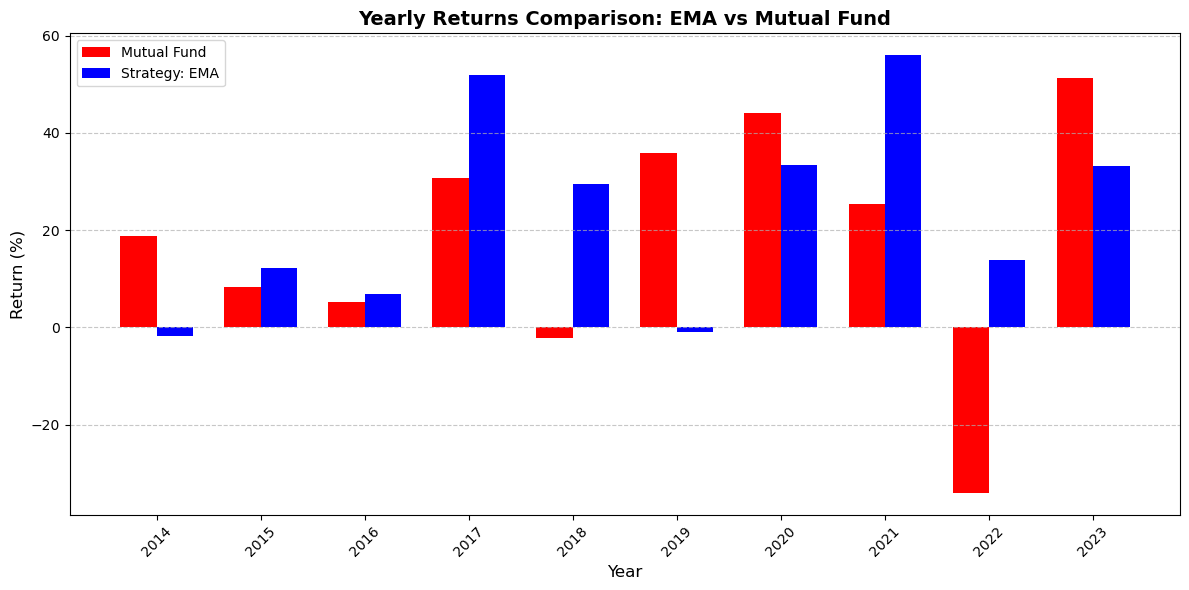

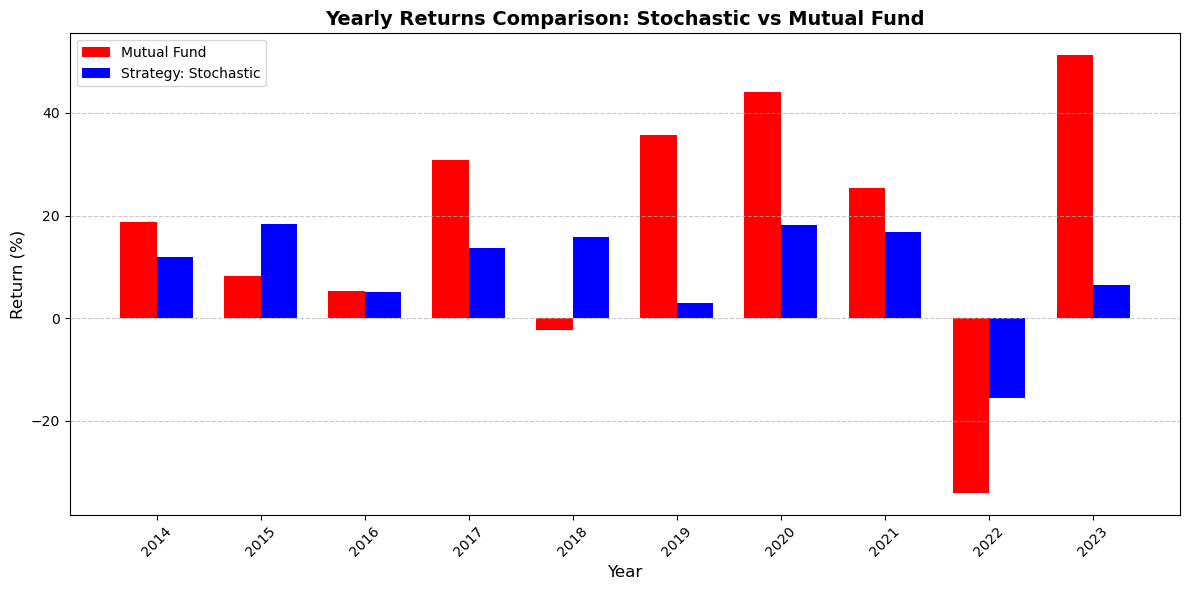

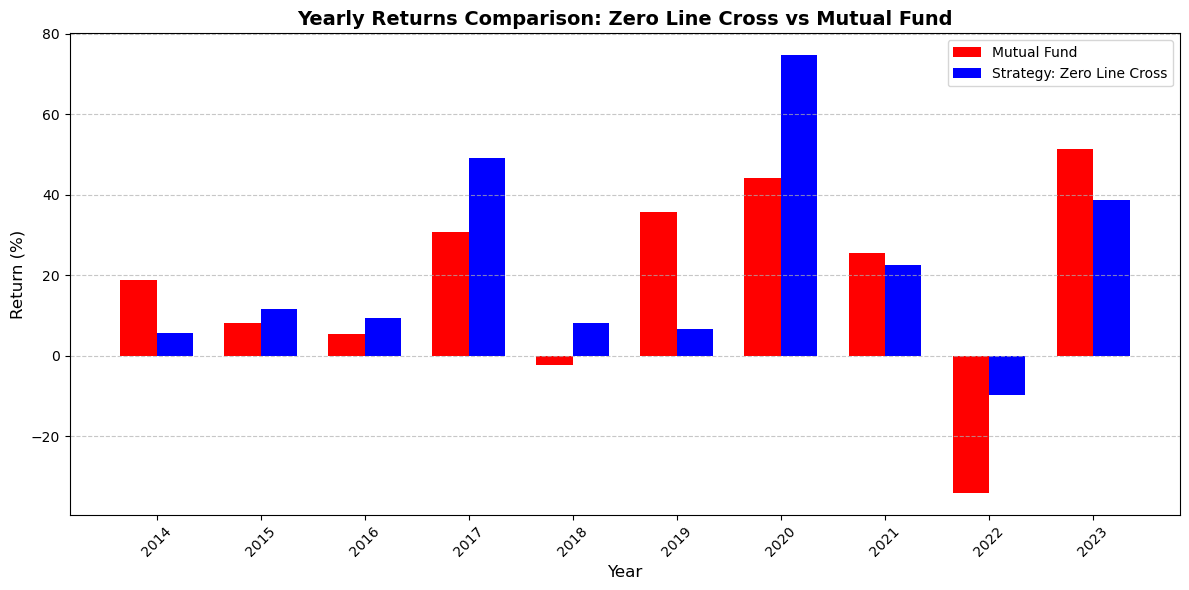

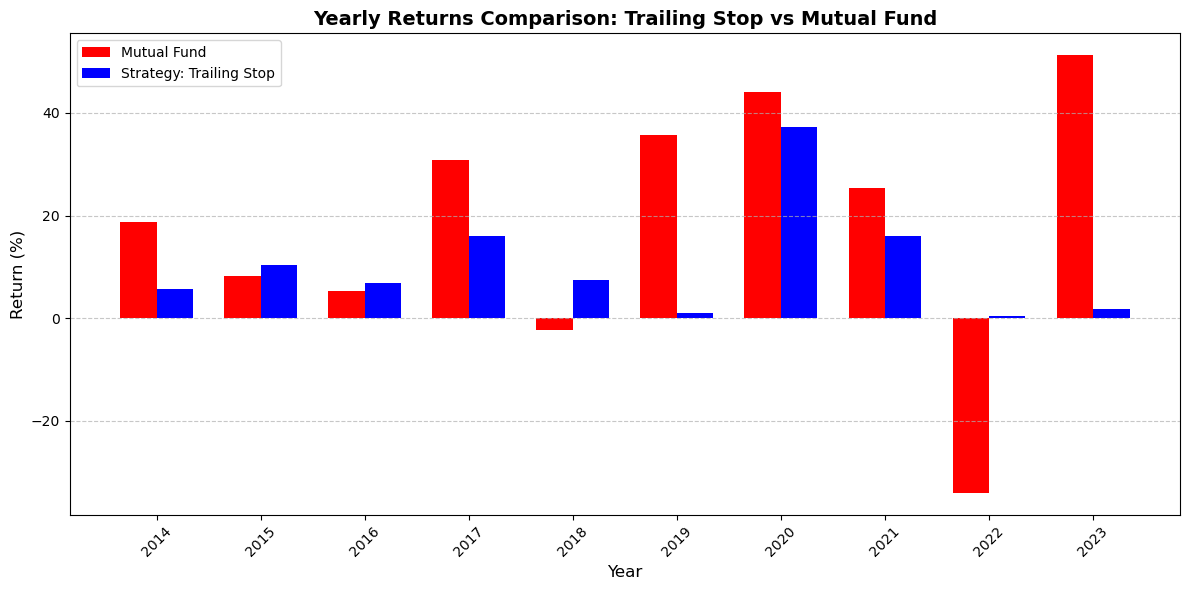

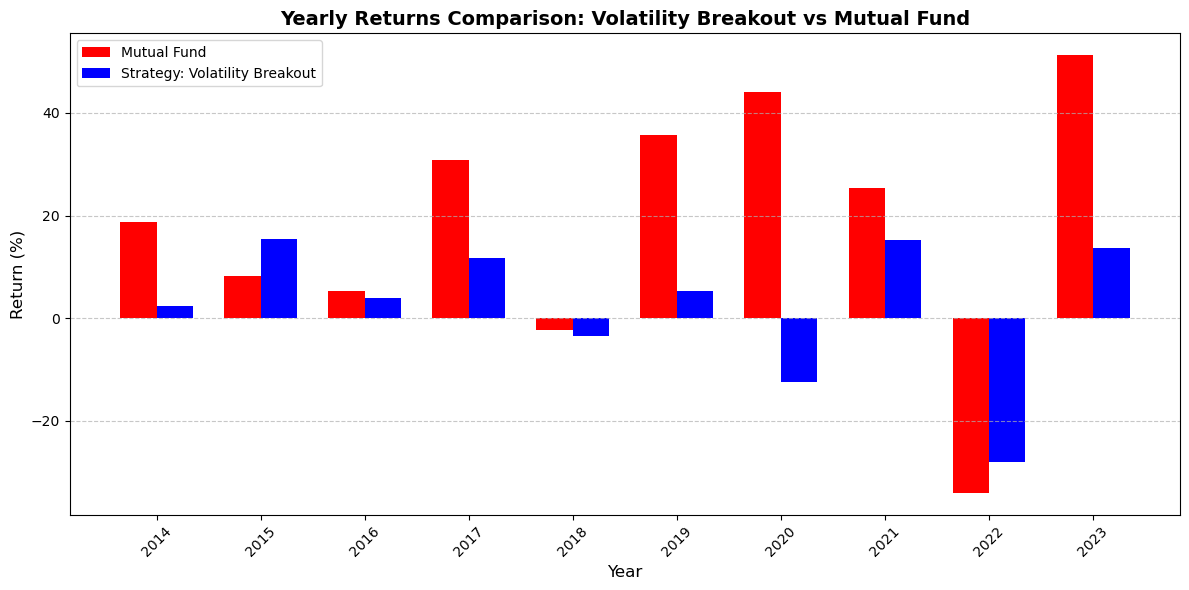

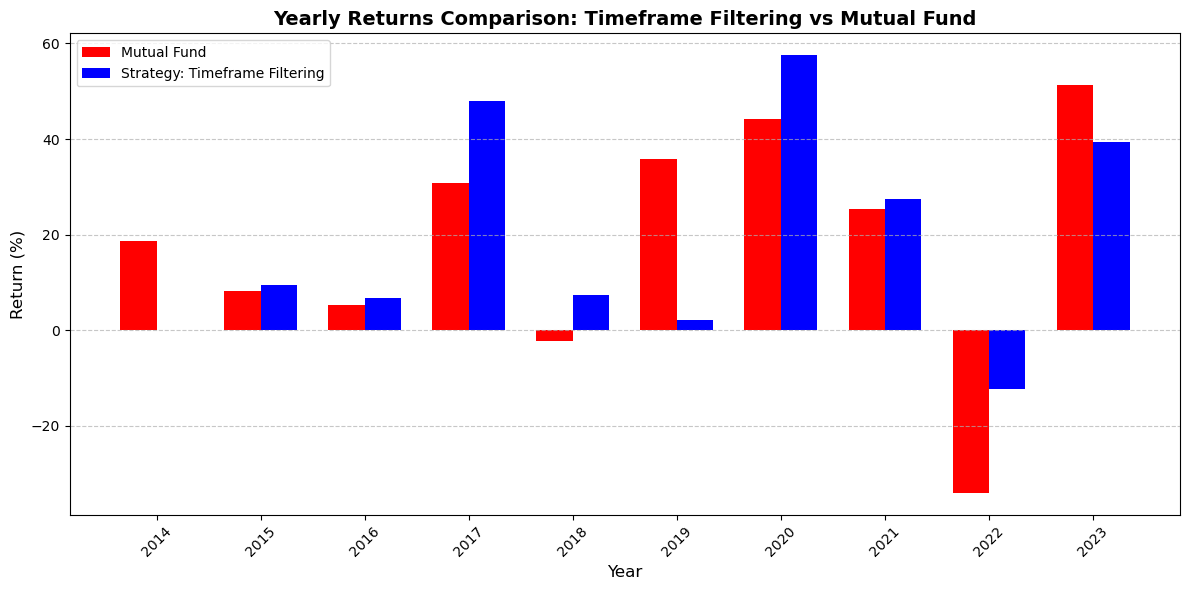

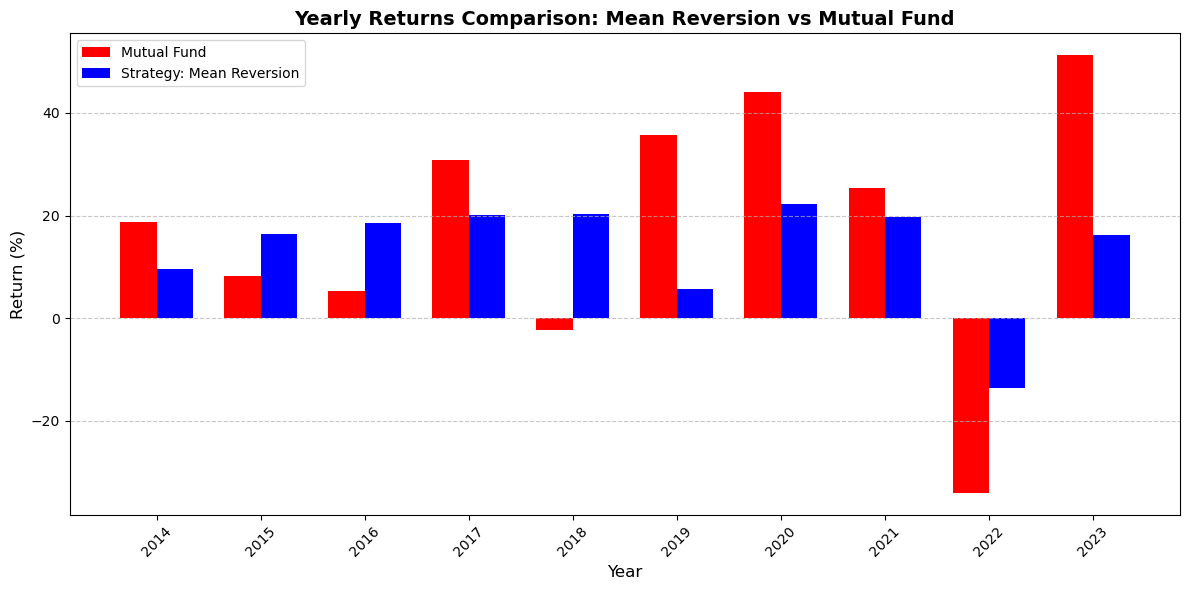

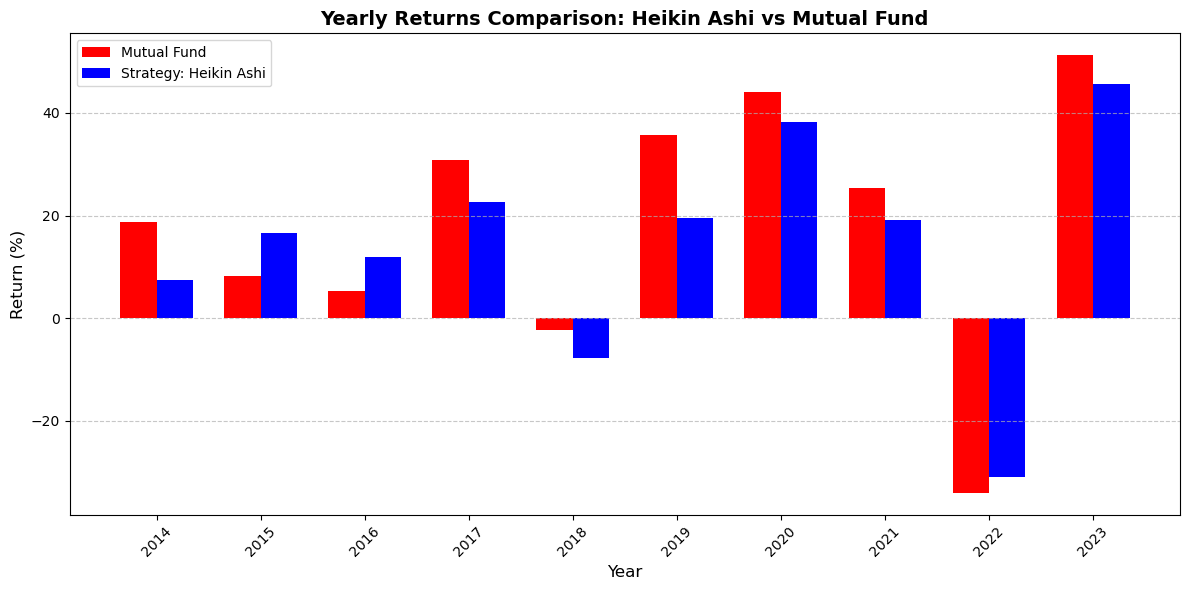

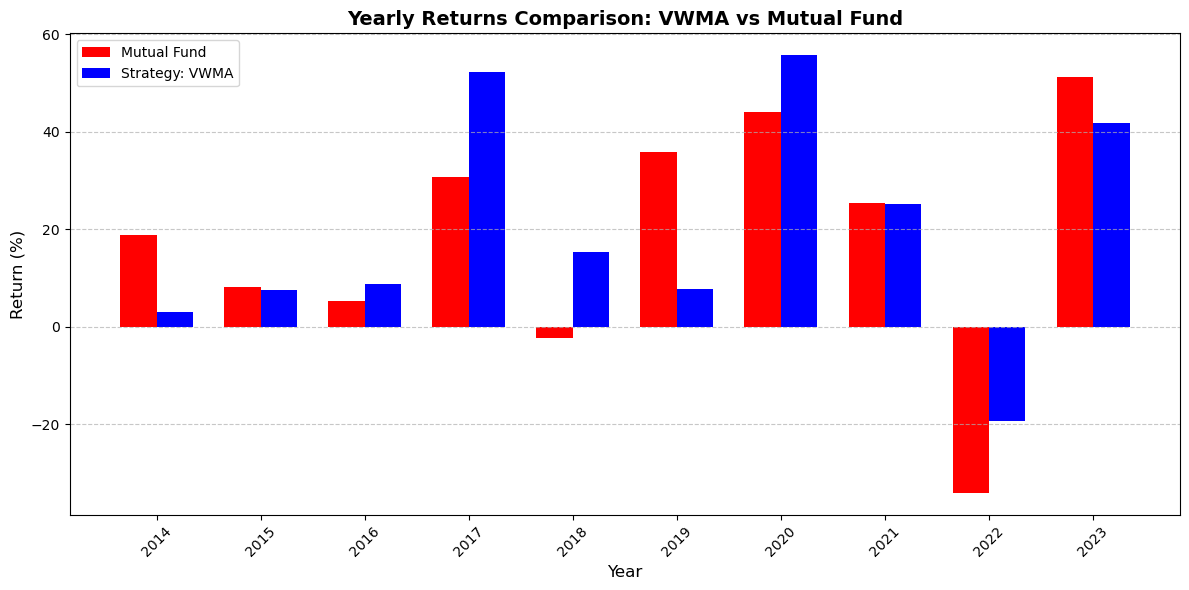

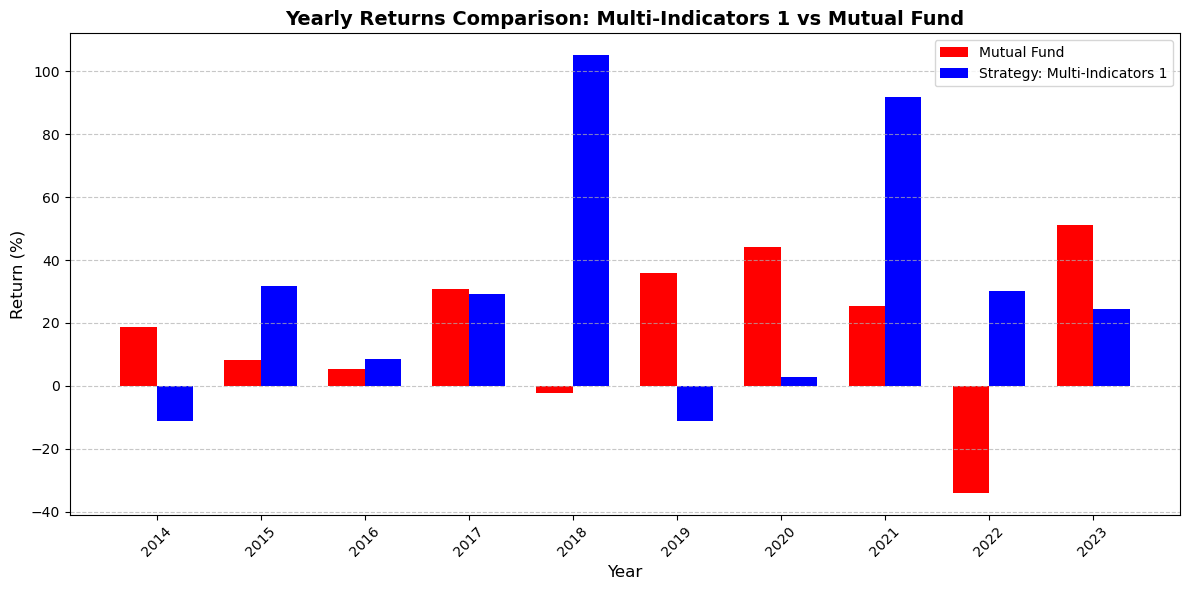

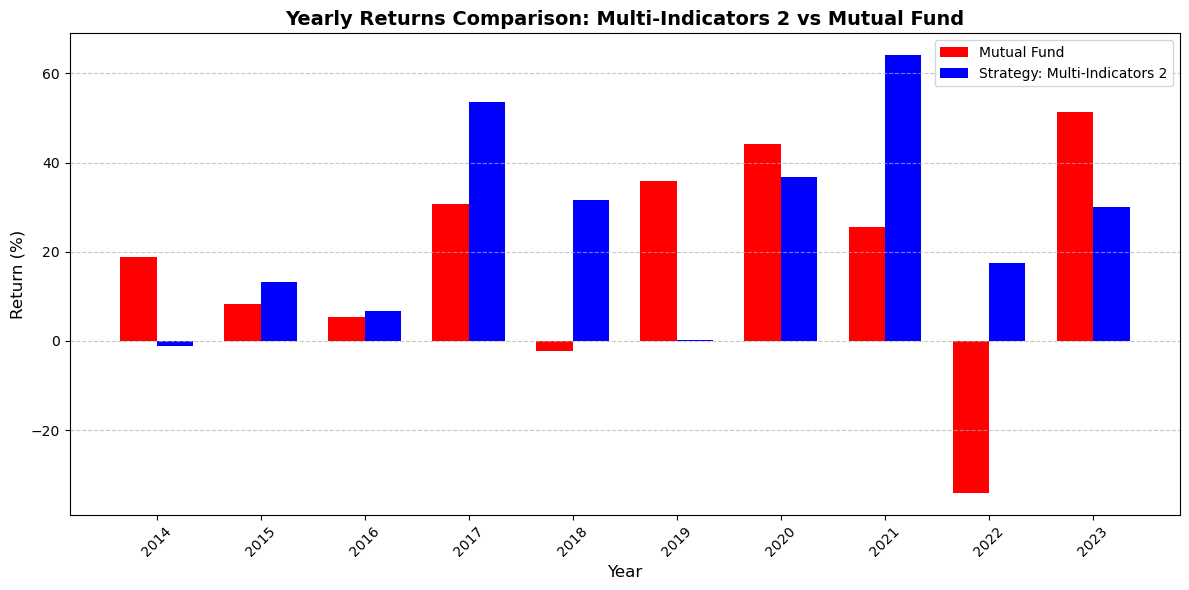

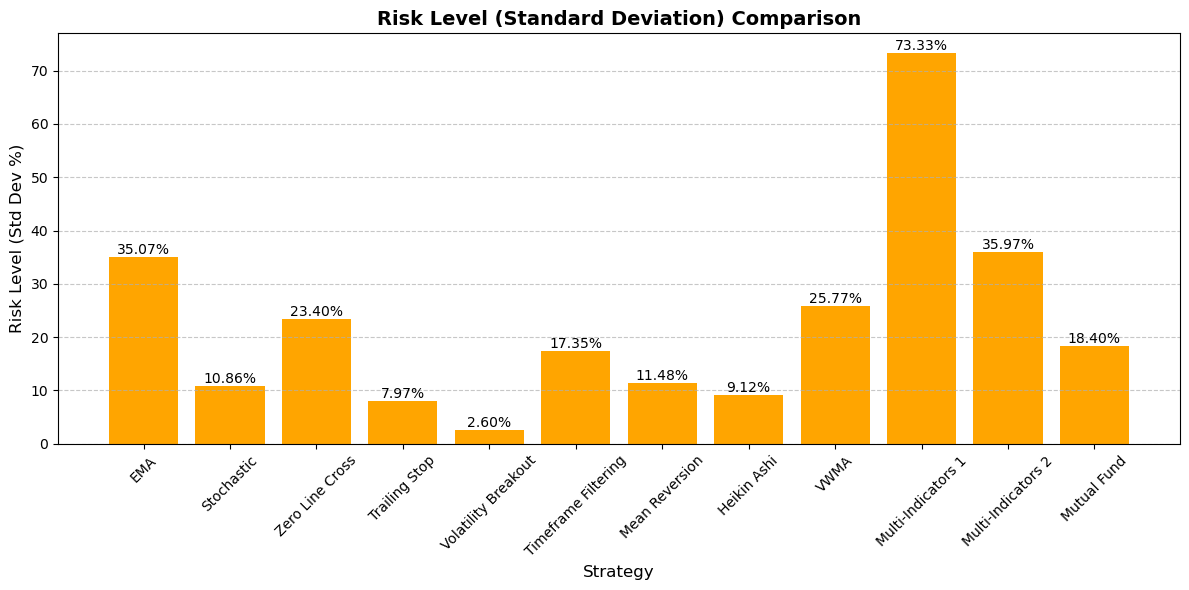

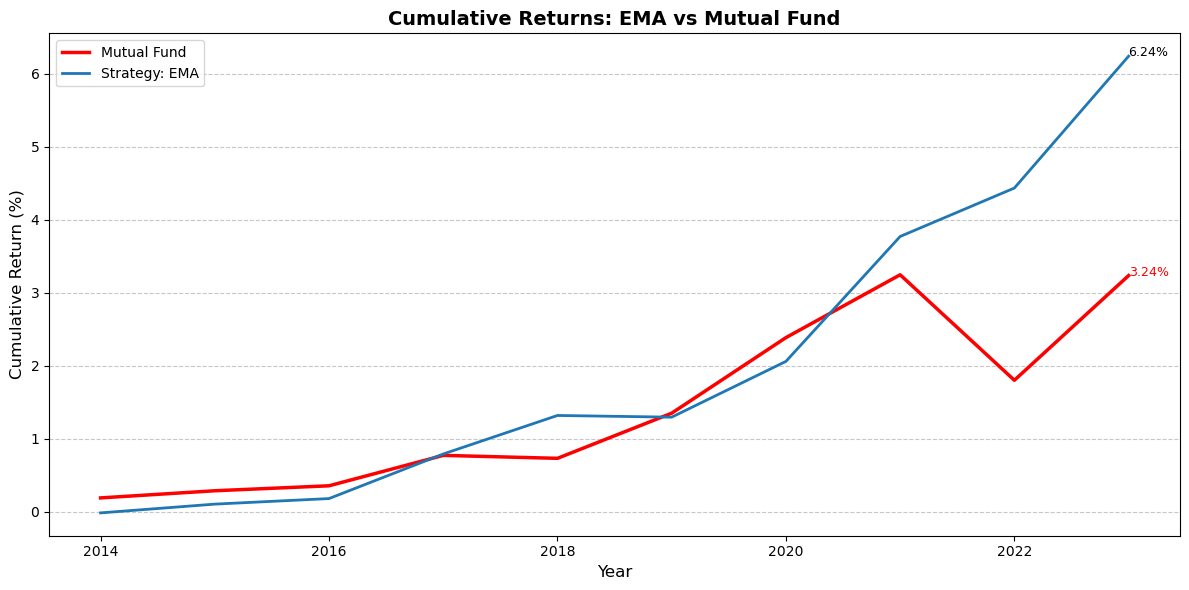

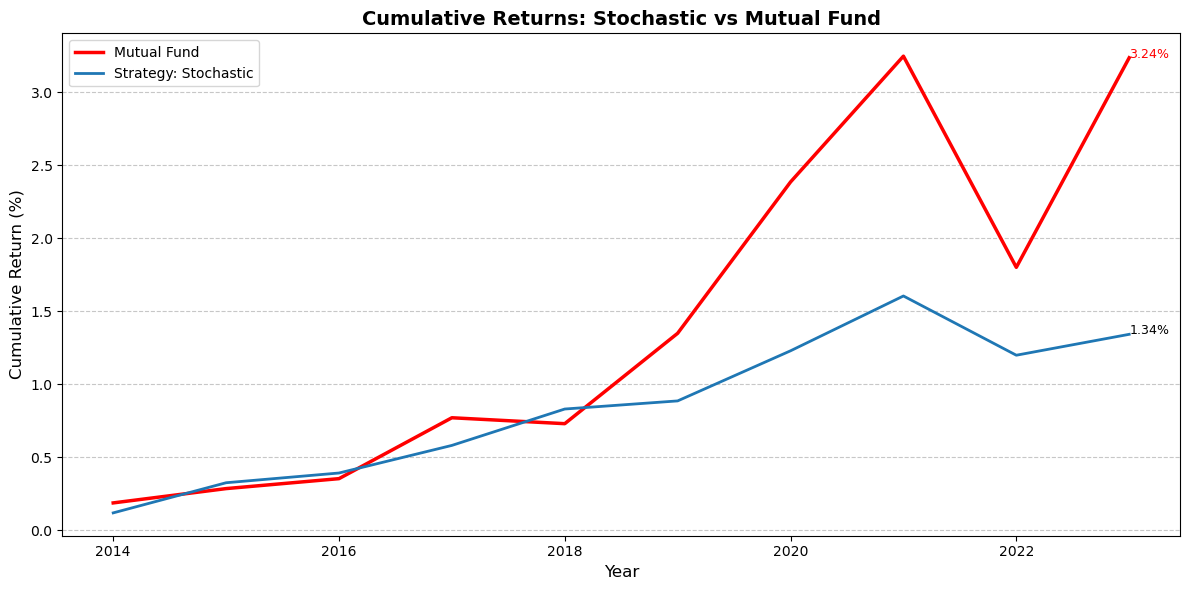

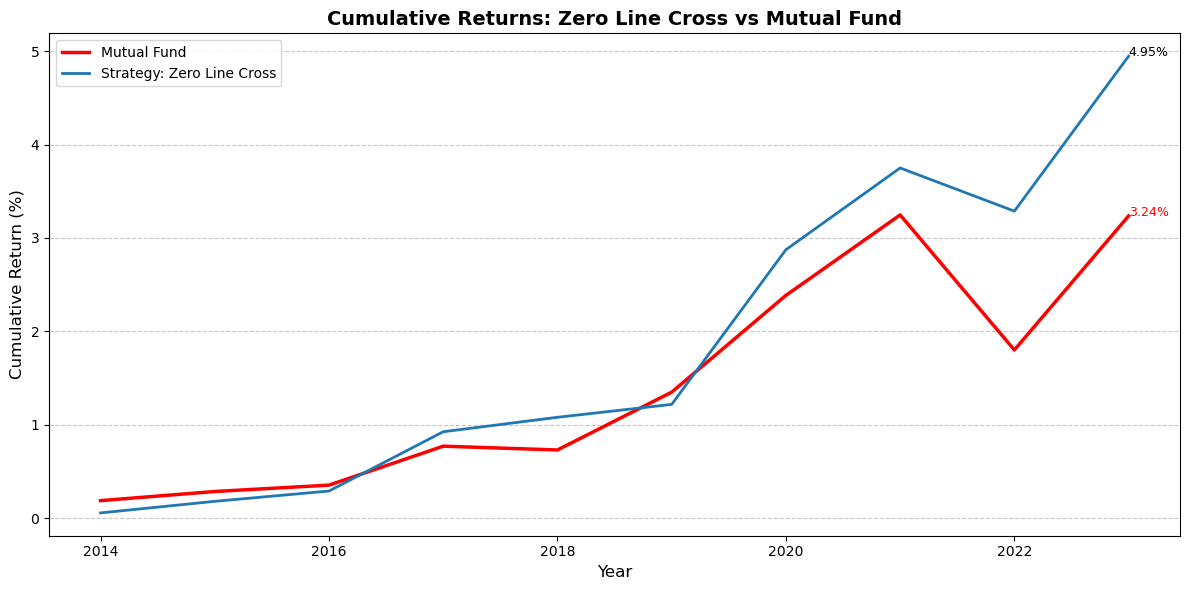

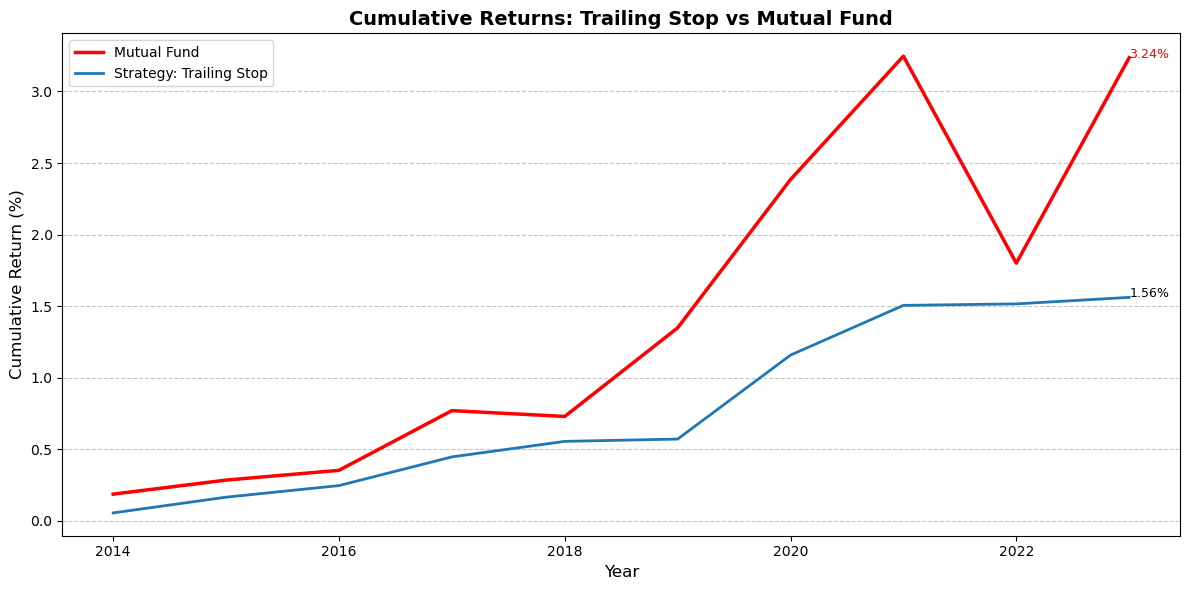

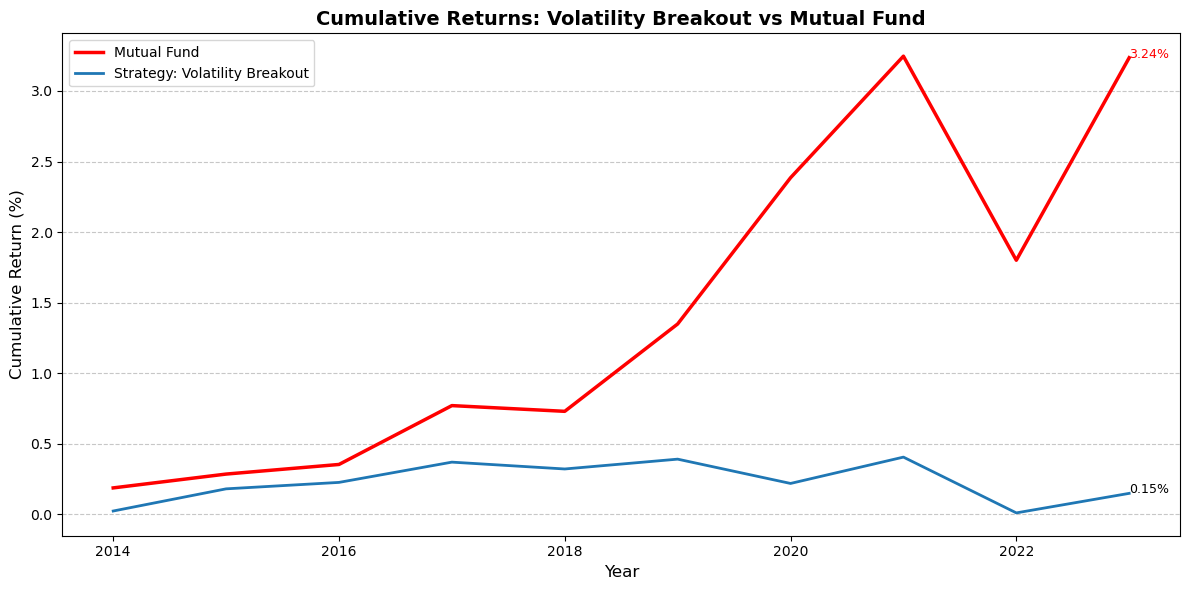

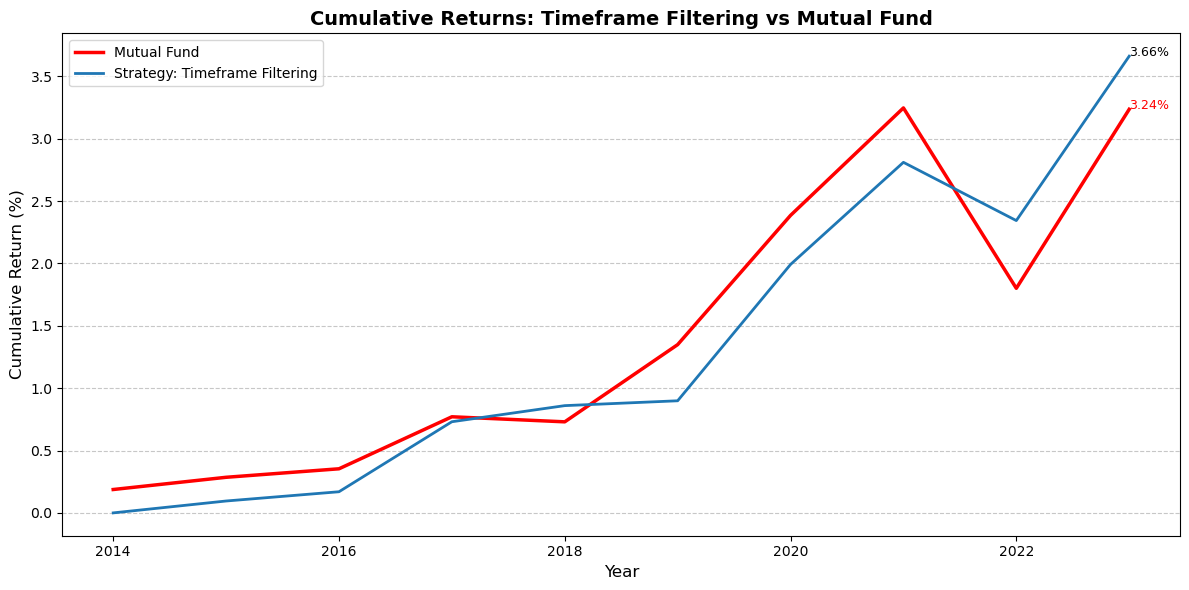

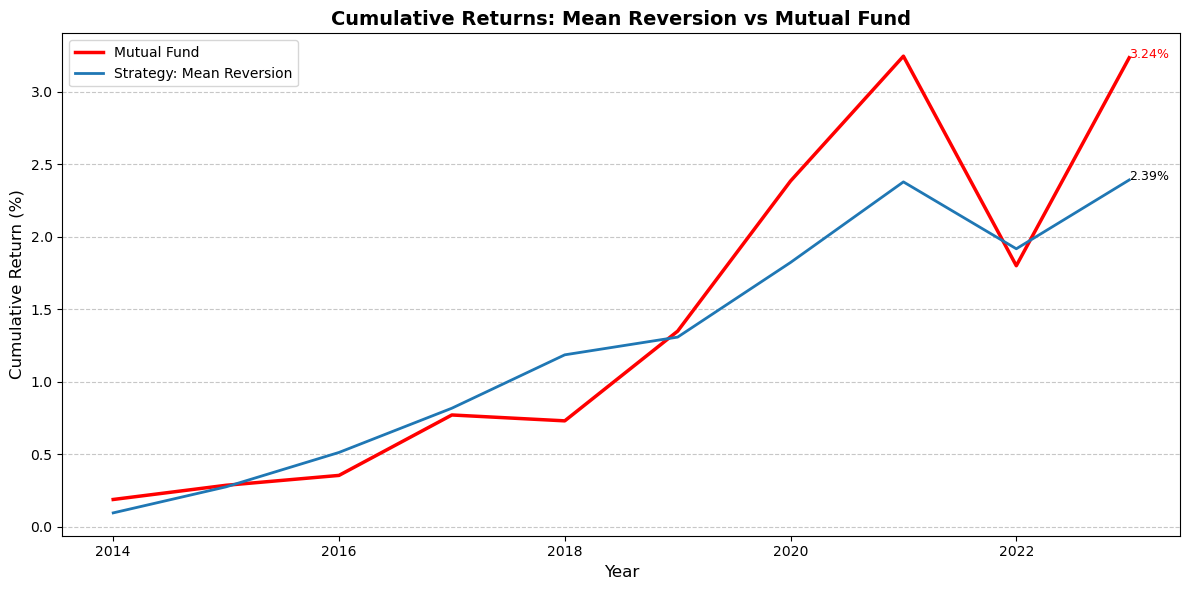

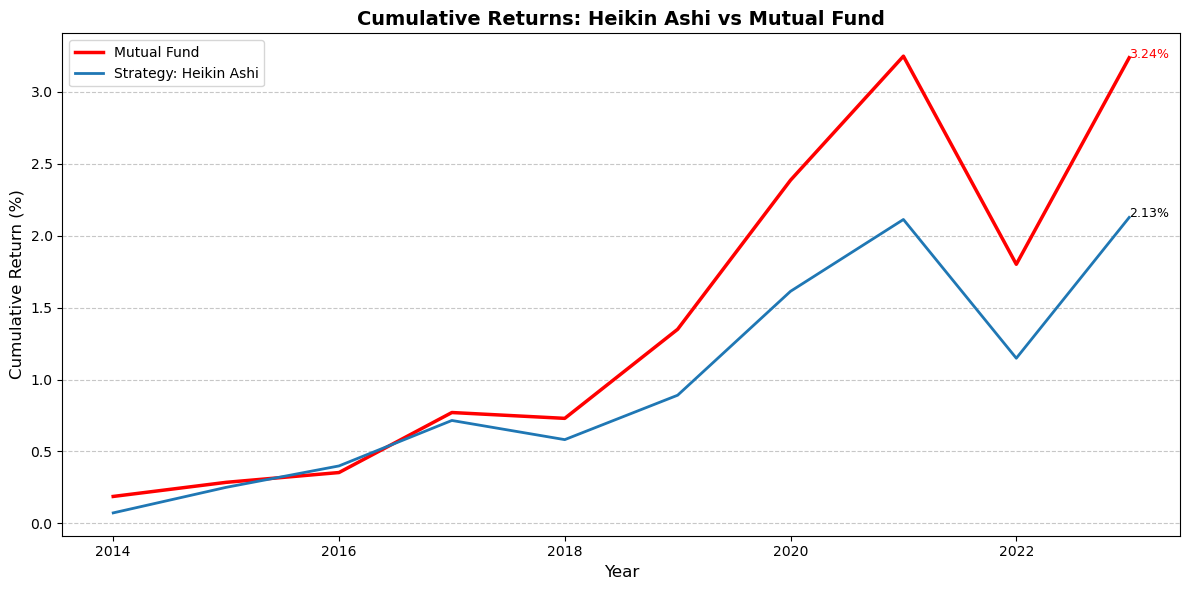

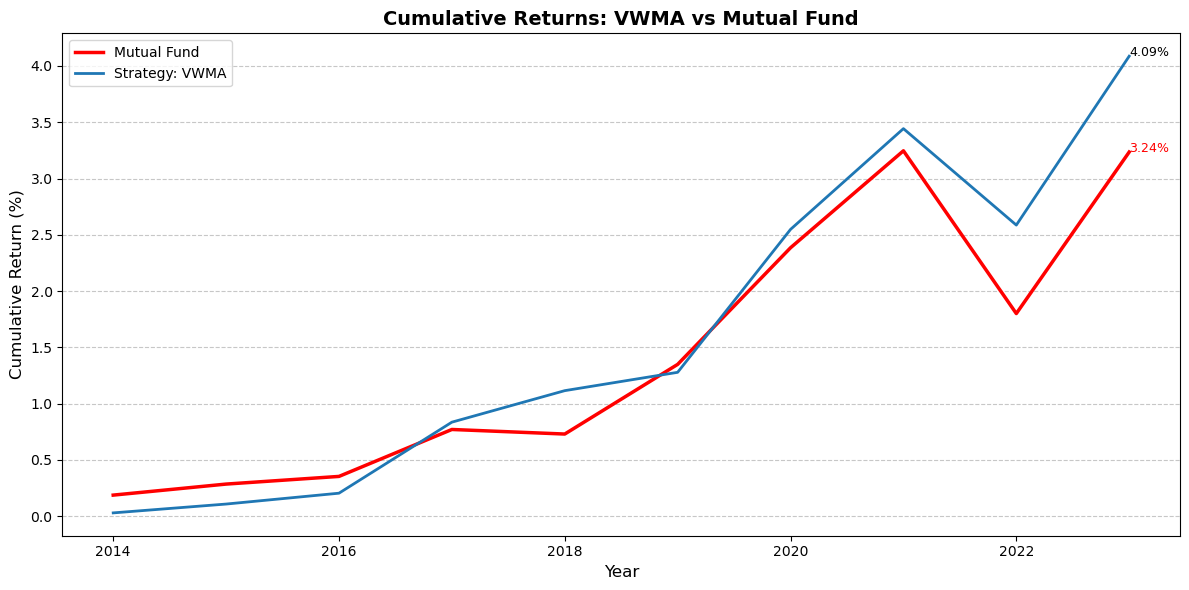

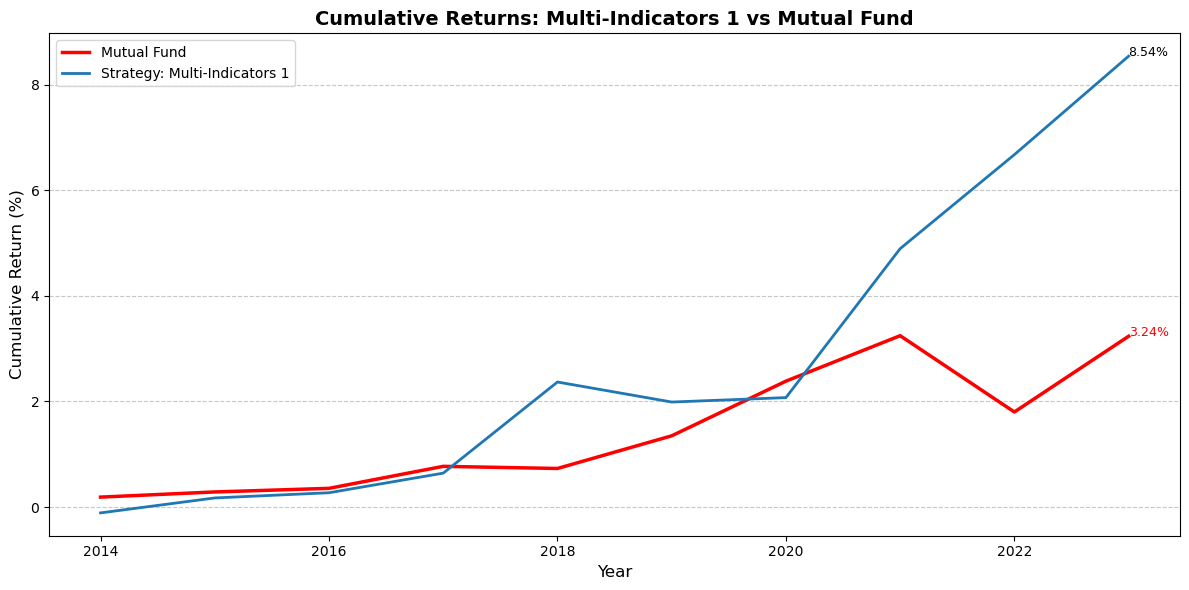

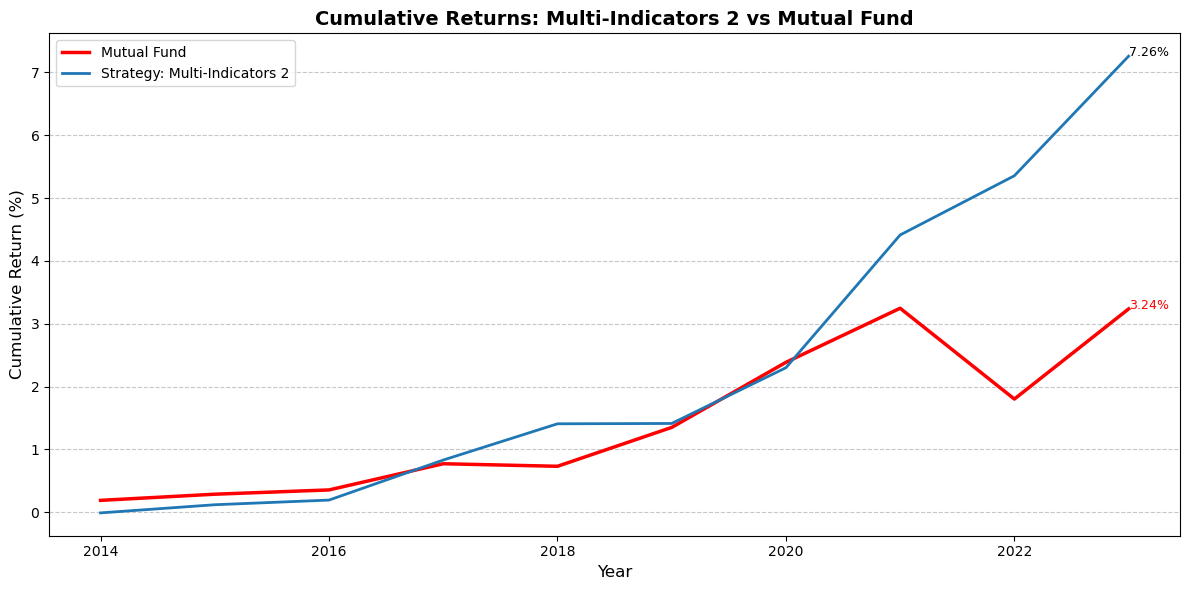

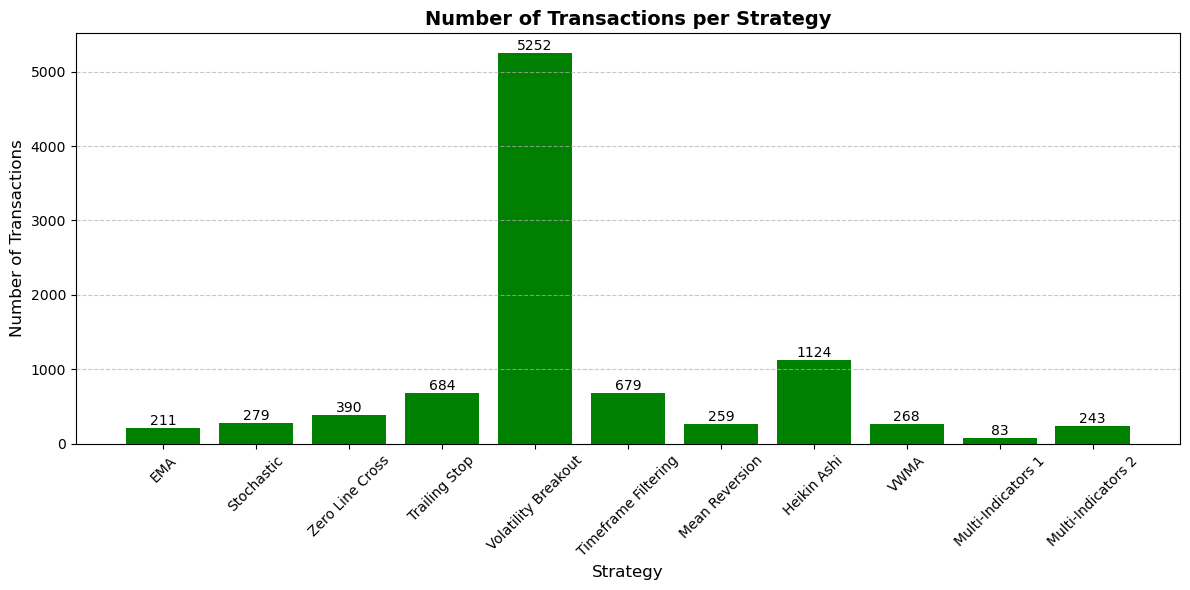

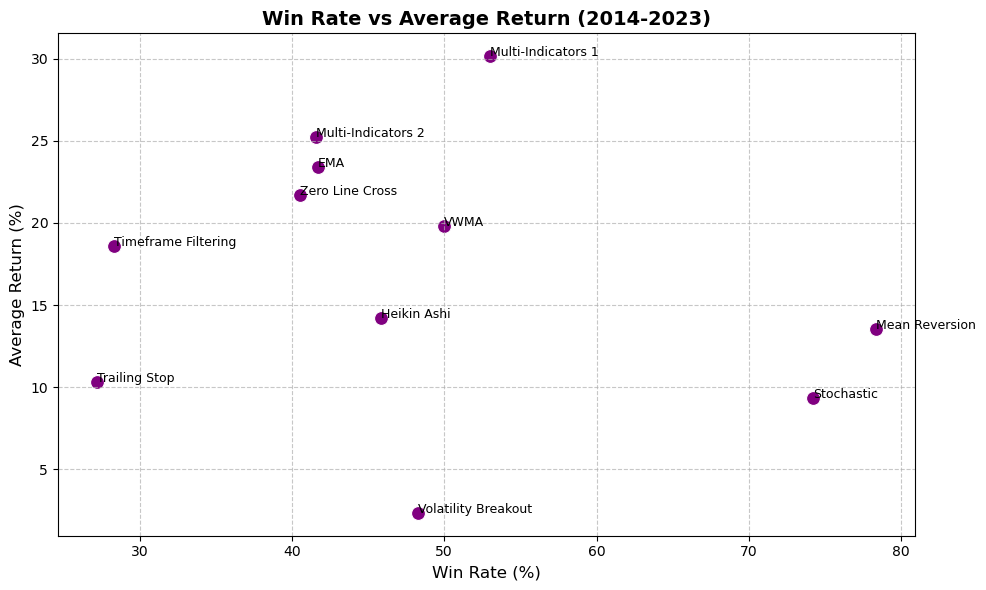

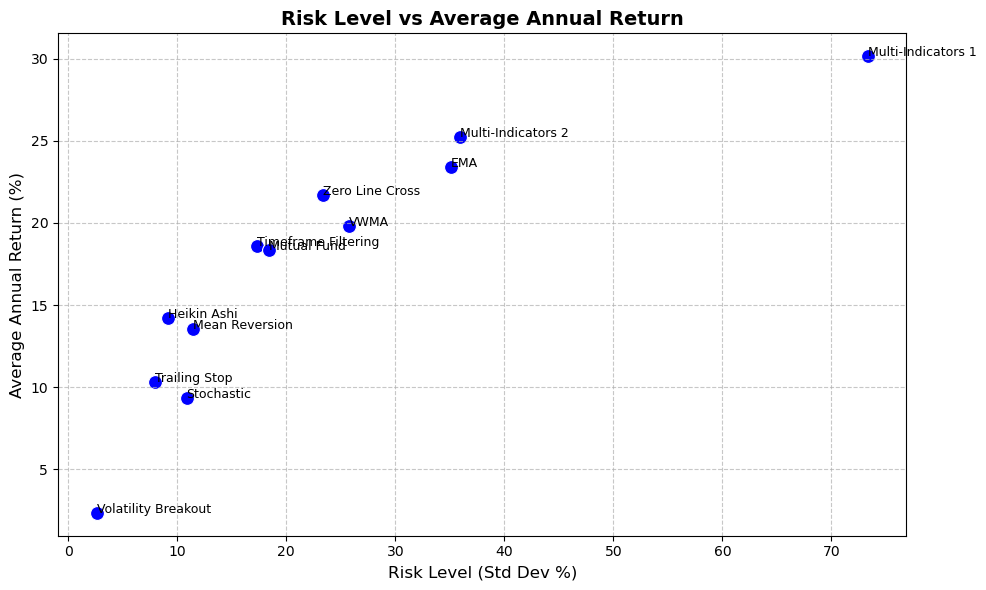

All plots have been saved in the 'plots' directory.


In [20]:
# Create a directory for saving the plots
output_dir = "plots"
os.makedirs(output_dir, exist_ok=True)

# Convert mutual fund returns dictionary to DataFrame
mutual_fund_df = pd.DataFrame(list(mutual_fund_returns.items()), columns=["Year", "Mutual Fund Return"])

# 1. Bar Chart: Year-by-Year Comparison of Annual Return
for strategy, annual_returns in strategy_metrics["annual_returns"].items():
    annual_returns_df = pd.DataFrame(annual_returns.items(), columns=["Year", "Return"])
    comparison_df = pd.merge(mutual_fund_df, annual_returns_df, on="Year", suffixes=("_MutualFund", f"_{strategy}"))
    
    plt.figure(figsize=(12, 6))
    bar_width = 0.35
    index = comparison_df["Year"]
    
    plt.bar(index - bar_width / 2, comparison_df["Mutual Fund Return"], bar_width, label="Mutual Fund", color="red")
    plt.bar(index + bar_width / 2, comparison_df["Return"], bar_width, label=f"Strategy: {strategy}", color="blue")
    
    plt.title(f"Yearly Returns Comparison: {strategy} vs Mutual Fund", fontsize=14, weight="bold")
    plt.xlabel("Year", fontsize=12)
    plt.ylabel("Return (%)", fontsize=12)
    plt.xticks(index, fontsize=10, rotation=45)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f"{strategy}_vs_mutual_fund_bar_chart.png"))
    plt.show()

# 2. Risk Level Comparison Bar Chart
plt.figure(figsize=(12, 6))
risk_levels_df = pd.DataFrame(strategy_metrics["risk_levels"].items(), columns=["Strategy", "Risk Level (Std Dev)"])
risk_levels_df = pd.concat([risk_levels_df, pd.DataFrame({"Strategy": ["Mutual Fund"], "Risk Level (Std Dev)": [mutual_fund_risk_level]})])

bars = plt.bar(risk_levels_df["Strategy"], risk_levels_df["Risk Level (Std Dev)"], color='orange')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}%', ha='center', va='bottom', fontsize=10)

plt.title("Risk Level (Standard Deviation) Comparison", fontsize=14, weight="bold")
plt.ylabel("Risk Level (Std Dev %)", fontsize=12)
plt.xlabel("Strategy", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "risk_level_comparison.png"))
plt.show()

# 3. Cumulative Return Chart for Each Strategy with Mutual Fund
for strategy, annual_returns in strategy_metrics["annual_returns"].items():
    annual_returns_df = pd.DataFrame(annual_returns.items(), columns=["Year", "Return"])
    cumulative_comparison_df = mutual_fund_df.copy()
    cumulative_comparison_df["Cumulative Mutual Fund Return"] = (1 + cumulative_comparison_df["Mutual Fund Return"] / 100).cumprod() - 1
    cumulative_comparison_df[f"Cumulative {strategy} Return"] = (1 + annual_returns_df["Return"] / 100).cumprod() - 1

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=cumulative_comparison_df, x="Year", y="Cumulative Mutual Fund Return", label="Mutual Fund", color="red", linewidth=2.5)
    sns.lineplot(data=cumulative_comparison_df, x="Year", y=f"Cumulative {strategy} Return", label=f"Strategy: {strategy}", linewidth=2)
    plt.title(f"Cumulative Returns: {strategy} vs Mutual Fund", fontsize=14, weight="bold")
    plt.xlabel("Year", fontsize=12)
    plt.ylabel("Cumulative Return (%)", fontsize=12)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.legend()
    plt.tight_layout()
    # Annotate final value
    final_value = cumulative_comparison_df[f"Cumulative {strategy} Return"].iloc[-1]
    plt.text(cumulative_comparison_df["Year"].iloc[-1], final_value, f"{final_value:.2f}%", fontsize=9)
    # Annotate final value for the Mutual Fund
    final_value_mutual_fund = cumulative_comparison_df["Cumulative Mutual Fund Return"].iloc[-1]
    plt.text(cumulative_comparison_df["Year"].iloc[-1], final_value_mutual_fund, f"{final_value_mutual_fund:.2f}%", fontsize=9, color="red")
    plt.savefig(os.path.join(output_dir, f"cumulative_returns_{strategy}_vs_mutual_fund.png"))
    plt.show()

# 4. Number of Transactions by Strategy Chart
strategy_transaction_counts_df = pd.DataFrame(strategy_metrics["transaction_counts"].items(), columns=["Strategy", "Number of Transactions"])
plt.figure(figsize=(12, 6))
bars = plt.bar(strategy_transaction_counts_df["Strategy"], strategy_transaction_counts_df["Number of Transactions"], color='green')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{int(yval)}', ha='center', va='bottom', fontsize=10)
plt.title("Number of Transactions per Strategy", fontsize=14, weight='bold')
plt.ylabel("Number of Transactions", fontsize=12)
plt.xlabel("Strategy", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "number_of_transactions.png"))
plt.show()

# 5. Scatterplot: Win Rate vs Average Return for Each Strategy
plt.figure(figsize=(10, 6))
sns.scatterplot(data=win_rate_vs_avg_return_df, x="Win Rate", y="Average Return", color='purple', s=100)
for i, row in win_rate_vs_avg_return_df.iterrows():
    plt.text(row["Win Rate"], row["Average Return"], row["Strategy"], fontsize=9)
plt.title("Win Rate vs Average Return (2014-2023)", fontsize=14, weight='bold')
plt.xlabel("Win Rate (%)", fontsize=12)
plt.ylabel("Average Return (%)", fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "win_rate_vs_avg_return.png"))
plt.show()

# 6. Scatterplot: Risk Level vs Average Annual Return for Each Strategy
risk_vs_return_df = pd.DataFrame({
    "Strategy": list(strategy_metrics["risk_levels"].keys()),
    "Risk Level (Std Dev %)": list(strategy_metrics["risk_levels"].values()),
    "Average Annual Return (%)": list(strategy_metrics["overall_averages"].values())
})
risk_vs_return_df = pd.concat([risk_vs_return_df, pd.DataFrame({"Strategy": ["Mutual Fund"], "Risk Level (Std Dev %)": [mutual_fund_risk_level], "Average Annual Return (%)": [mutual_fund_overall_avg_return]})])
plt.figure(figsize=(10, 6))
sns.scatterplot(data=risk_vs_return_df, x="Risk Level (Std Dev %)", y="Average Annual Return (%)", color='blue', s=100)
for i, row in risk_vs_return_df.iterrows():
    plt.text(row["Risk Level (Std Dev %)"], row["Average Annual Return (%)"], row["Strategy"], fontsize=9)
plt.title("Risk Level vs Average Annual Return", fontsize=14, weight='bold')
plt.xlabel("Risk Level (Std Dev %)", fontsize=12)
plt.ylabel("Average Annual Return (%)", fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "risk_level_vs_avg_return.png"))
plt.show()

# Notify where plots are saved
print(f"All plots have been saved in the '{output_dir}' directory.")


# Average Return Comparison: Strategies vs TDB981 (2014-2023)

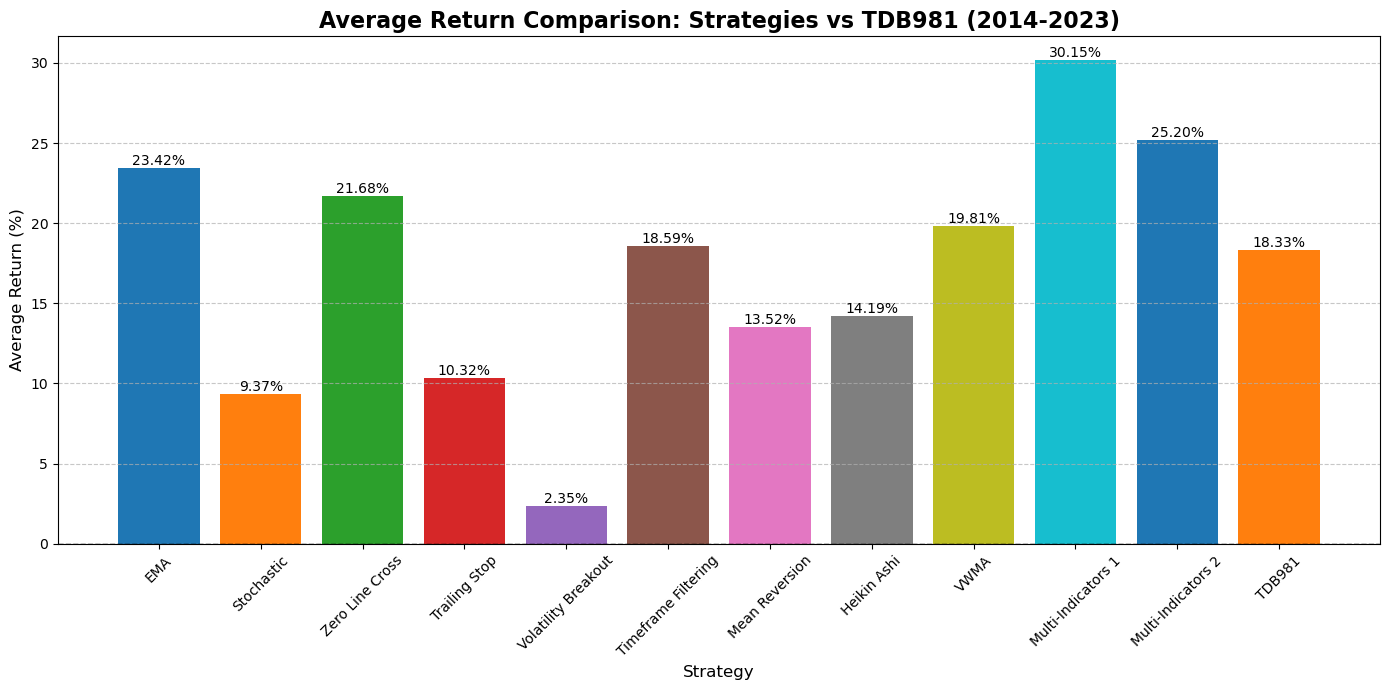

In [22]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a directory for saving the plots
output_dir = "eda_charts"
os.makedirs(output_dir, exist_ok=True)  # Create output directory if it doesn't exist

# Prepare data for average return comparison
avg_return_values = list(strategy_metrics["overall_averages"].values())
avg_return_values.append(mutual_fund_overall_avg_return)  # Add mutual fund average return

# Update labels to be shorter (strategy name only)
updated_labels = [
    "EMA", "Stochastic", "Zero Line Cross", "Trailing Stop", 
    "Volatility Breakout", "Timeframe Filtering", "Mean Reversion", 
    "Heikin Ashi", "VWMA", "Multi-Indicators 1", "Multi-Indicators 2", "TDB981"
]

# Plot the average return comparison
plt.figure(figsize=(14, 7))
bars = plt.bar(updated_labels, avg_return_values, color=sns.color_palette("tab10", len(updated_labels)))
plt.title("Average Return Comparison: Strategies vs TDB981 (2014-2023)", fontsize=16, weight='bold')
plt.xlabel("Strategy", fontsize=12)
plt.ylabel("Average Return (%)", fontsize=12)
plt.xticks(rotation=45, fontsize=10)

# Annotate bars with values
for bar, value in zip(bars, avg_return_values):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f"{value:.2f}%", ha='center', va='bottom', fontsize=10)

plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Baseline at y=0
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()


# Comparison of Cumulative Returns: Strategies vs. Mutual Fund

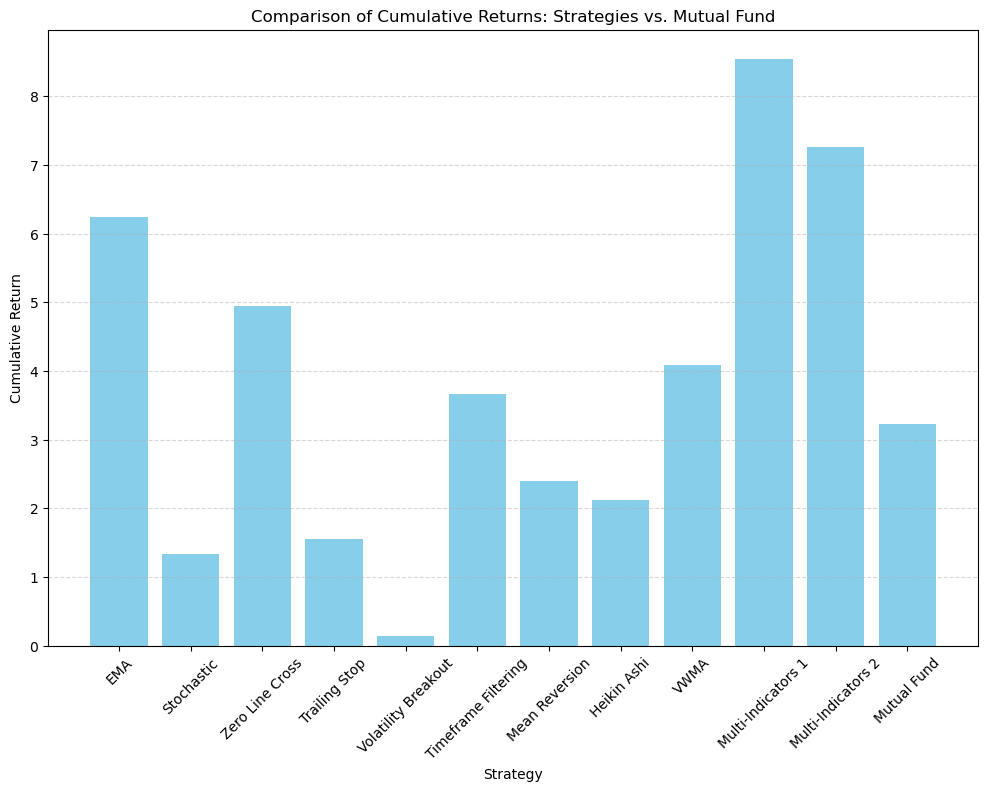

In [24]:
strategy_annual_returns = strategy_metrics['annual_returns']

# Calculate cumulative returns for each strategy
strategy_cumulative_returns = {}
for strategy, returns in strategy_annual_returns.items():
    df = pd.DataFrame(list(returns.items()), columns=['Year', 'Return %'])
    df['Cumulative Return'] = (1 + df['Return %'] / 100).cumprod() - 1
    strategy_cumulative_returns[strategy] = df['Cumulative Return'].iloc[-1]  # Get the last value

mutual_fund_df = pd.DataFrame(list(mutual_fund_returns.items()), columns=['Year', 'Return'])
mutual_fund_df['Cumulative Return'] = (1 + mutual_fund_df['Return'] / 100).cumprod() - 1
strategy_cumulative_returns['Mutual Fund'] = mutual_fund_df['Cumulative Return'].iloc[-1]

# Convert to DataFrame for plotting
cumulative_returns_df = pd.DataFrame(list(strategy_cumulative_returns.items()), columns=['Strategy', 'Cumulative Return'])

# Plotting the bar chart
plt.figure(figsize=(12, 8))
plt.bar(cumulative_returns_df['Strategy'], cumulative_returns_df['Cumulative Return'], color='skyblue')
plt.xlabel('Strategy')
plt.ylabel('Cumulative Return')
plt.title('Comparison of Cumulative Returns: Strategies vs. Mutual Fund')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()
